# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

## Loading the dataset

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))

In [ ]:
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 36275 rows and 19 columns.


In [ ]:
# Checking the statistical summary of the data, "include='all'" will bring in also categorical columns and ".T" will change colums to rows and rows to columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


Obseravtion:

* Maximun number of adults per booking is 4
* Maximun number of children per booking is 10
* Meal plan 1 is the most popular type of meal plan
* Room_Type 1 is the most popular room type reserved
* 24,390 bookings were not conceled
* minimun average price per room is "0" this can be considered as missing value

In [ ]:
# replacing '0' with NAN
df['avg_price_per_room'] = df['avg_price_per_room'].replace(0,np.nan)

# changing the data type to float
df['avg_price_per_room'] = df['avg_price_per_room'].astype(float)

In [ ]:
#Changing the target column to numerical variable
df['booking_status']=df['booking_status'].replace({'Canceled':1,'Not_Canceled':0})

In [ ]:
# Checking if there are duplicate rows
df.duplicated().sum()

0

Observation:

* There are no duplicates in the data

In [ ]:
# filtering object type columns
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
cat_columns

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type']

In [ ]:
# Removing booking_ID colums 
cat_columns.remove('Booking_ID')

In [ ]:
# checking number of each unique value in every column
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# Function to display histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Create a new DataFrame where bookings were not canceled
df_not_canceled_booking=df.loc[df['booking_status']==0]


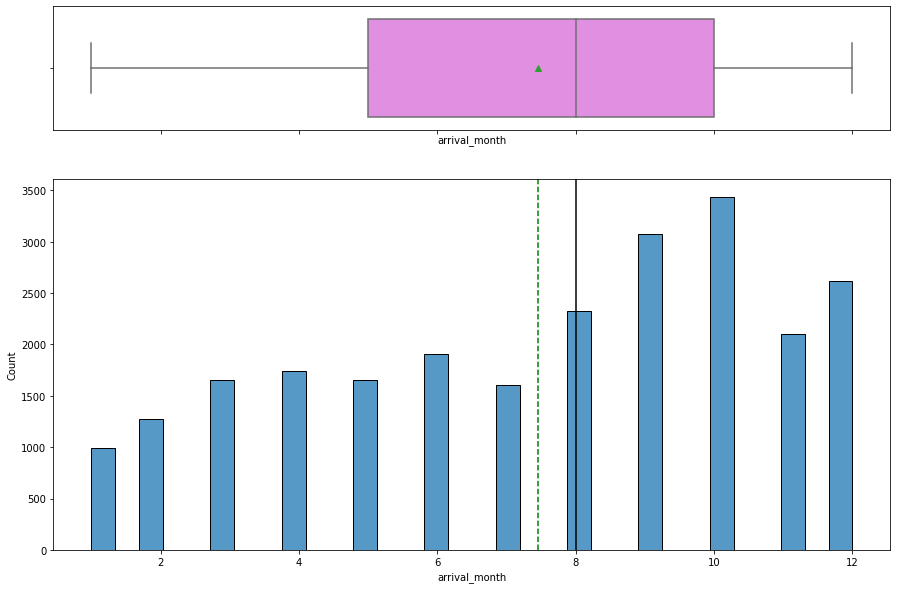

In [ ]:
histogram_boxplot(df_not_canceled_booking,'arrival_month')

Observation:

* October is the busiest month
* The distribution is left skewed

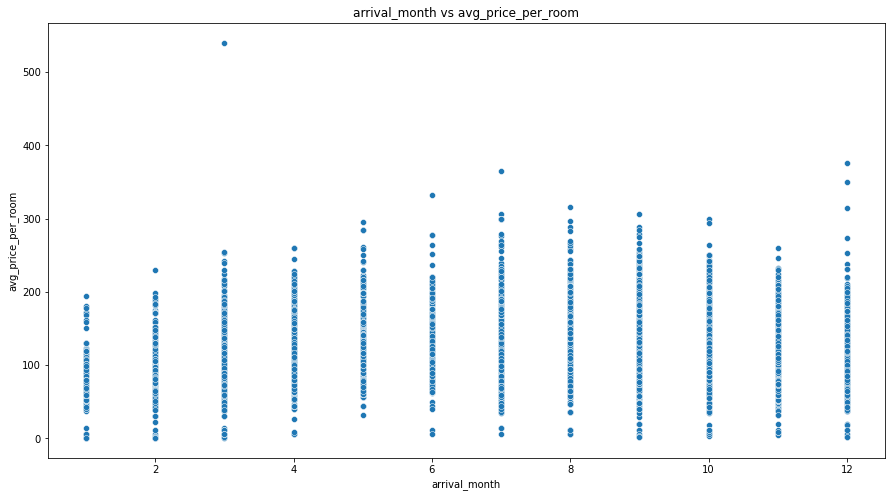

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='arrival_month',y='avg_price_per_room')
plt.title('arrival_month vs avg_price_per_room')
plt.show()

Observation:

* There is no relationship between average price and arrival month

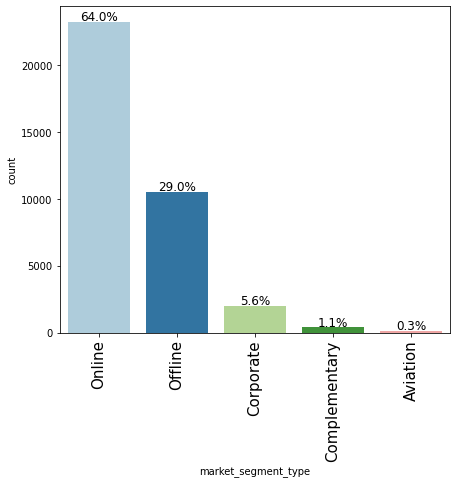

In [ ]:
labeled_barplot(df,'market_segment_type',perc=True)

Observation:

* 64% of clients come from "Online" market segmentation

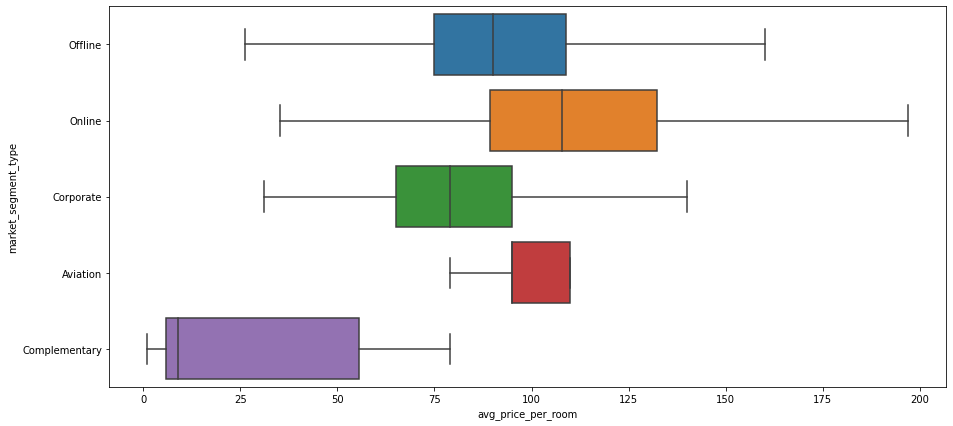

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='avg_price_per_room',y='market_segment_type',showfliers=False)
plt.show()

Observation:

* On average rice from "Online" is the most expensive followed by "Aviation" and "Offline"

In [ ]:
df['booking_status'].value_counts(1)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

Observation:

* Around 32% of bookings are canceled

In [ ]:
# Create a new DataFrame of repeating customers
df_repeating_customers=df.loc[df['repeated_guest']==1]

# Finding out the % of repeating customers that canceled their bookings
df_repeating_customers['booking_status'].value_counts(1)

0    0.982796
1    0.017204
Name: booking_status, dtype: float64

Observation:

* Only 1.7% of repeating customers canceled their bookings

In [ ]:
# Calculating number of spacial requests median per booking status
df.groupby(['booking_status'])['no_of_special_requests'].median().sort_values(ascending=False).reset_index()

,booking_status,no_of_special_requests
0,0,1.0
1,1,0.0


Observation:

* It can be observed that on average customers who have special requests do not cancel

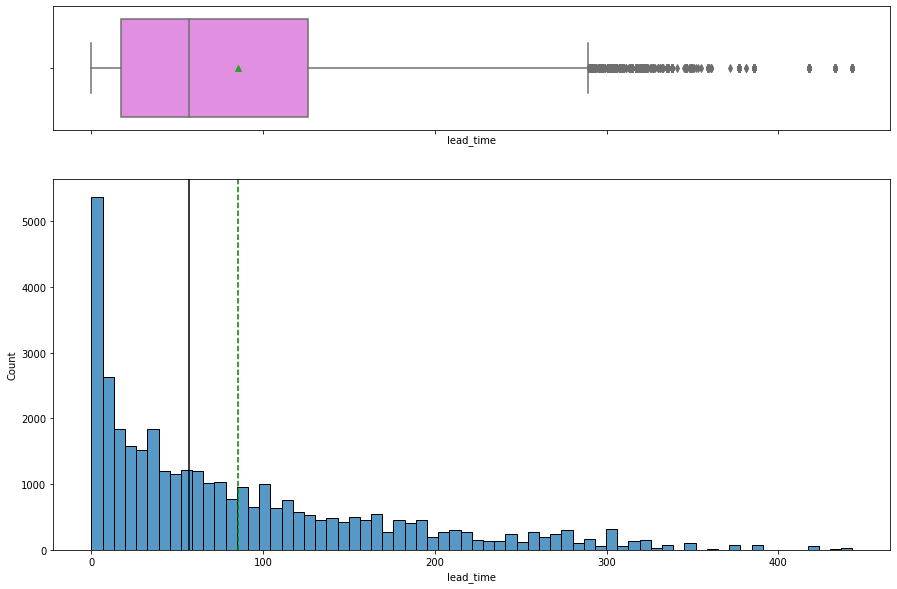

In [ ]:
histogram_boxplot(df,'lead_time' )

Observation:

* The distribution highly right skewed
* There are outliers in the upper side

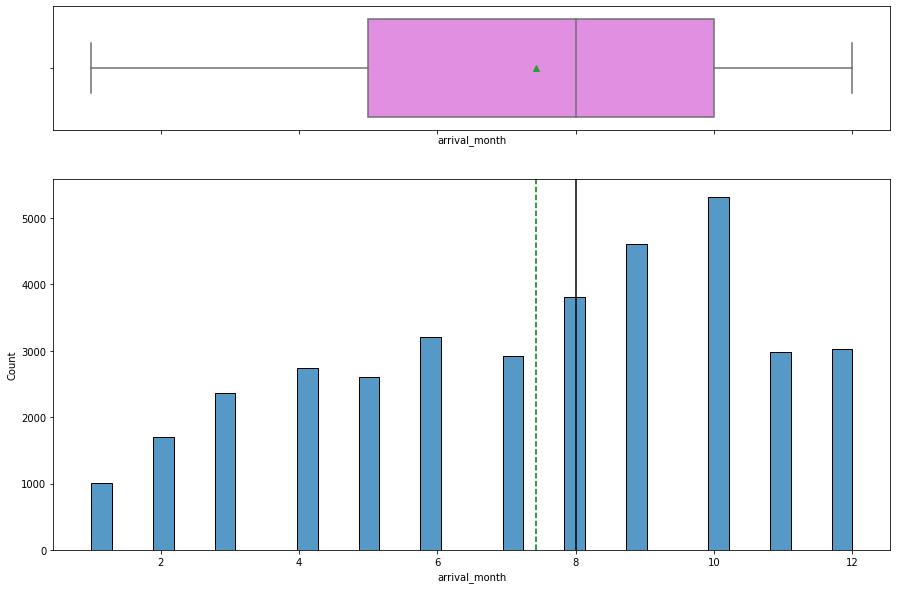

In [ ]:
histogram_boxplot(df,'arrival_month' )

Observation:

* The distribution is left skewed
* There are no outliers
* 75% of bookings were made from January to October

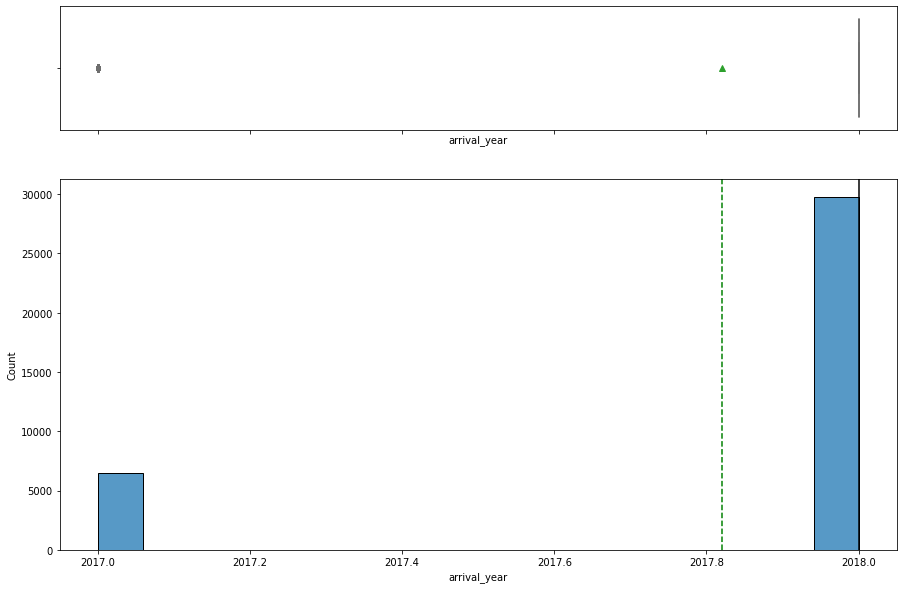

In [ ]:
histogram_boxplot(df,'arrival_year' )

Observation:

* The distribution is random
* There are no outliers

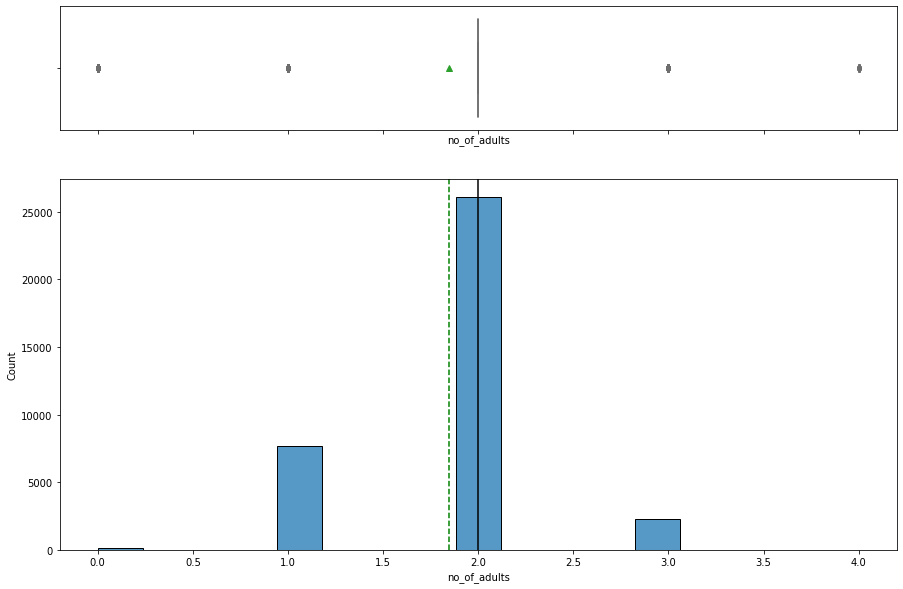

In [ ]:
histogram_boxplot(df,'no_of_adults' )

Observation:

* The distribution is slightly left skewed
* There are outliers on both side
 

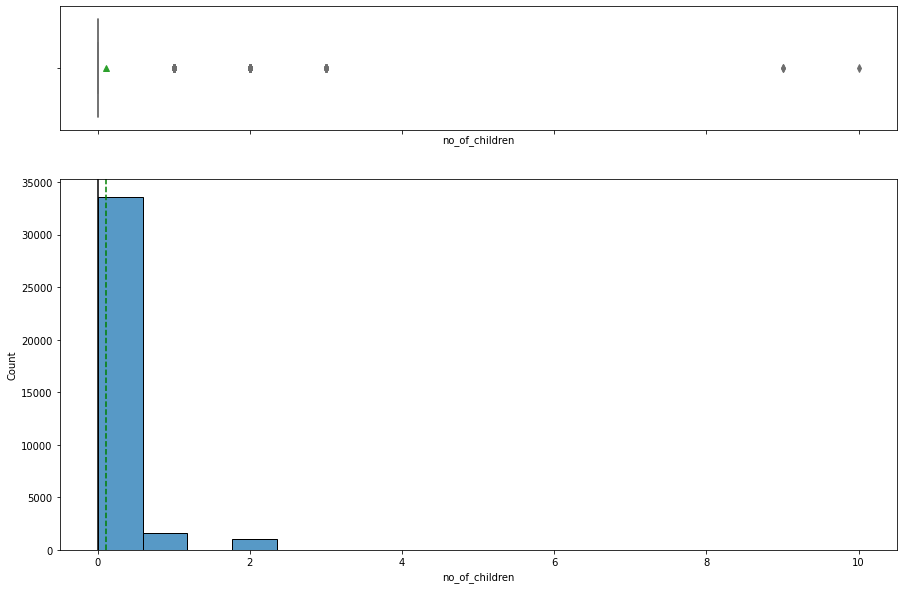

In [ ]:
histogram_boxplot(df,'no_of_children' )

Observation:

* The distribution is right skewed
* There are outliers in the right side

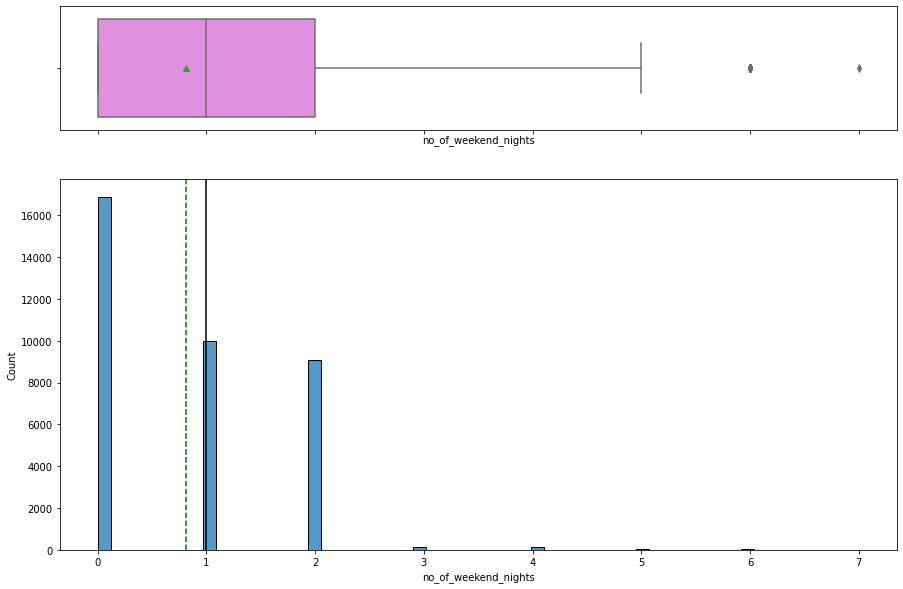

In [ ]:
histogram_boxplot(df,'no_of_weekend_nights' )

Observation:

* There are a outliers in the right side

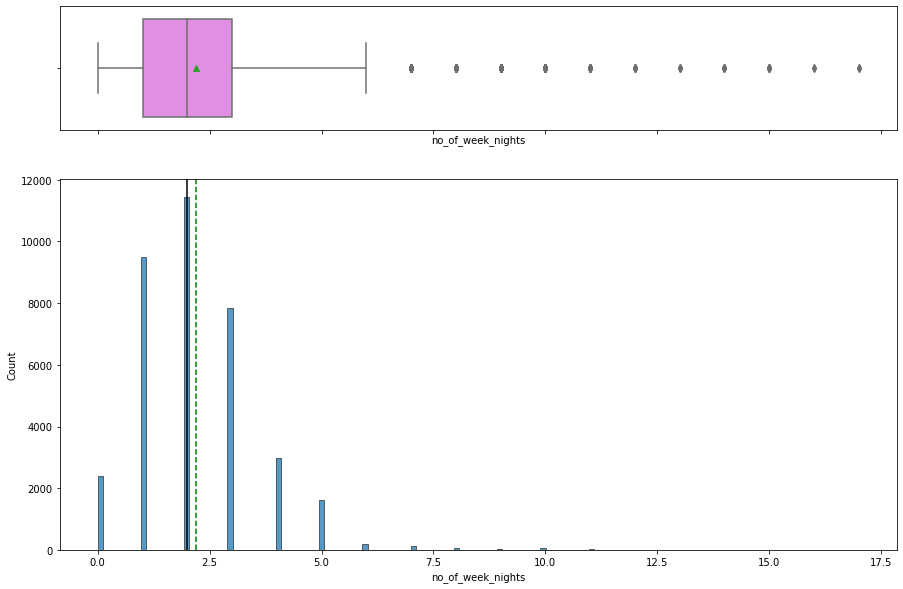

In [ ]:
histogram_boxplot(df,'no_of_week_nights' )

Obseravtion:

* The distribution is slightly right skewed
* There are outliers in the rigt side

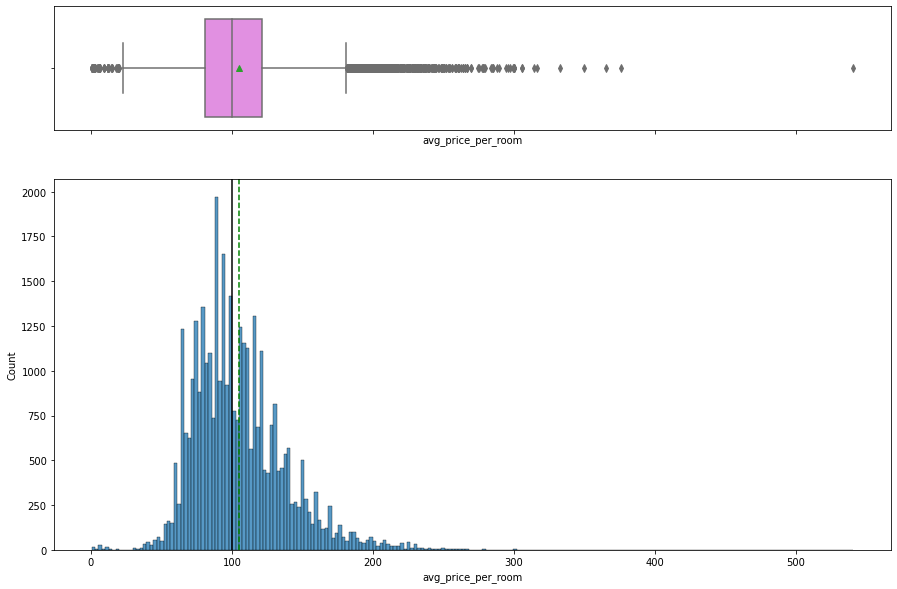

In [ ]:
histogram_boxplot(df,'avg_price_per_room' )

Observation:

* The distribution is right skewed
* There outliers in both side

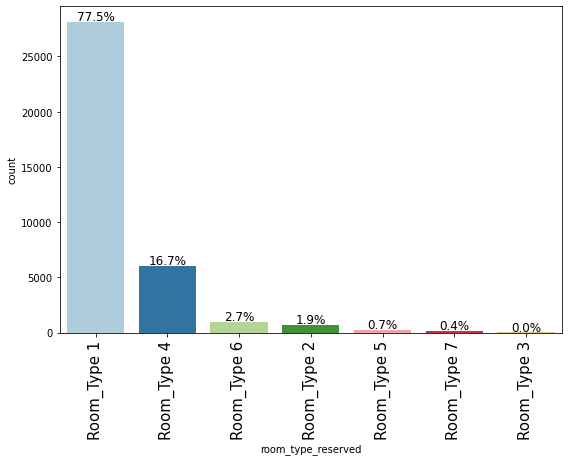

In [ ]:
labeled_barplot(df,'room_type_reserved',perc=True)

Observation:

* Room type 1 is most popular type of room ,followed by Room type 4 and Room type 6

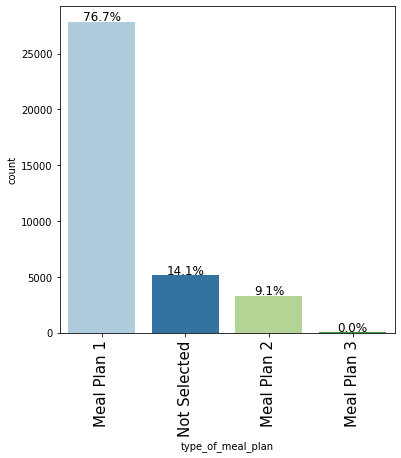

In [ ]:
labeled_barplot(df,'type_of_meal_plan',perc=True)

Observation:

* Meal plan 1 is the most popular type of meal plan

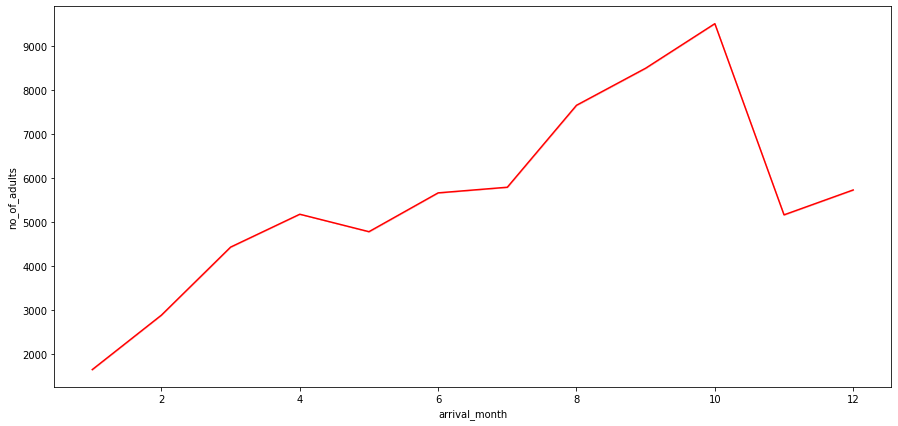

In [ ]:
cats = df.arrival_month.unique().tolist()
df.arrival_month = pd.Categorical(df.arrival_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="arrival_month", y="no_of_adults", ci=False, color="red", estimator='sum')
plt.ylabel('no_of_adults')
plt.xlabel('arrival_month')
plt.show()

Observation:

* Highest number of adults in bookings is in October

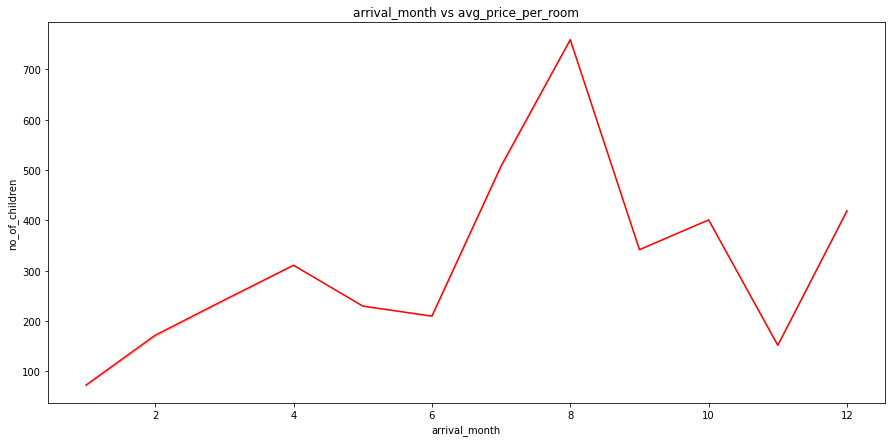

In [ ]:
cats = df.arrival_month.unique().tolist()
df.arrival_month = pd.Categorical(df.arrival_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="arrival_month", y="no_of_children", ci=False, color="red", estimator='sum')
plt.ylabel('no_of_children')
plt.xlabel('arrival_month')
plt.title('arrival_month vs avg_price_per_room')
plt.show()

Observation:

* Highest number of children in bookings is in August

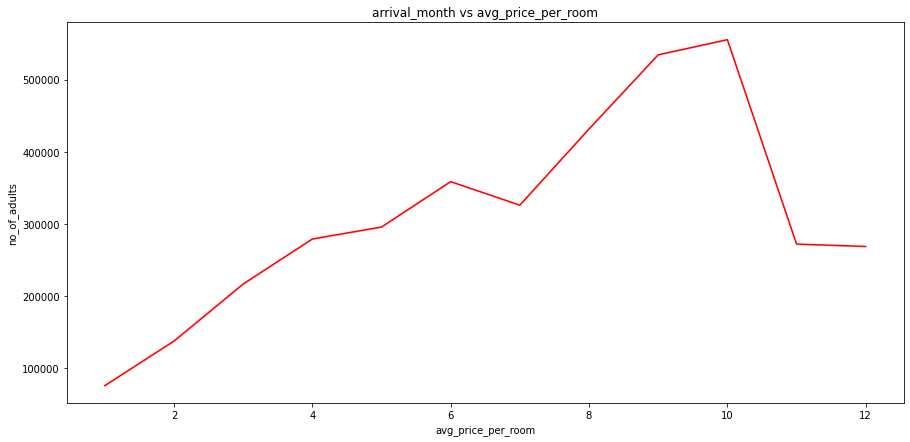

In [ ]:
cats = df.arrival_month.unique().tolist()
df.arrival_month = pd.Categorical(df.arrival_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room", ci=False, color="red", estimator='sum')
plt.ylabel('no_of_adults')
plt.xlabel('avg_price_per_room')
plt.title('arrival_month vs avg_price_per_room')
plt.show()

Observation:

* There is a hike in prices in October

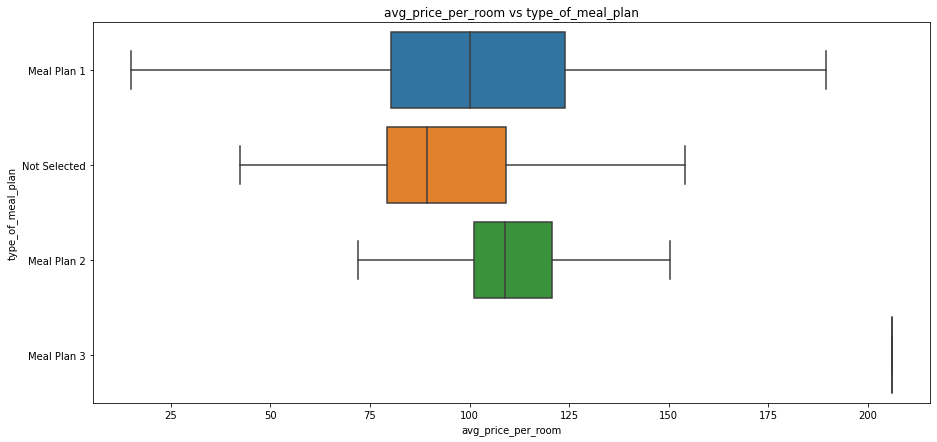

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='avg_price_per_room',y='type_of_meal_plan',showfliers=False)
plt.title('avg_price_per_room vs type_of_meal_plan')
plt.show()

Observation:

* As a customer pays a higher price for a room ,he gets Meal plan 3

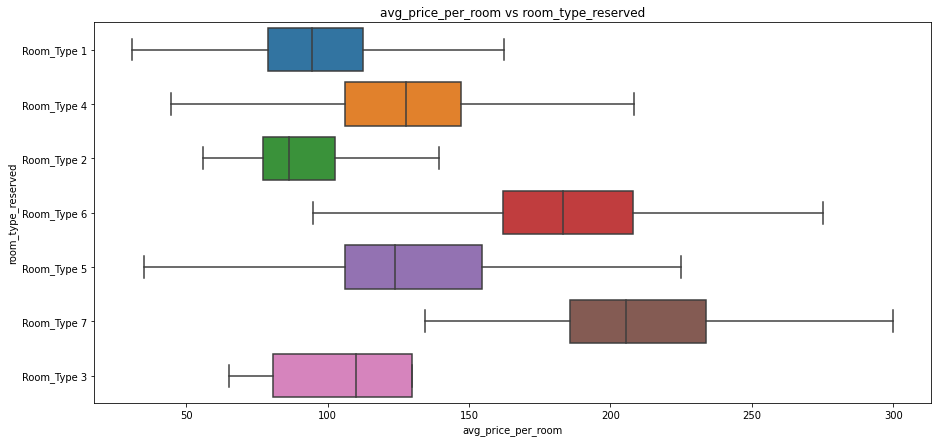

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='avg_price_per_room',y='room_type_reserved',showfliers=False)
plt.title('avg_price_per_room vs room_type_reserved')
plt.show()

Observation:

* Room type 7 is the most expensive room ,followed by Room type 6

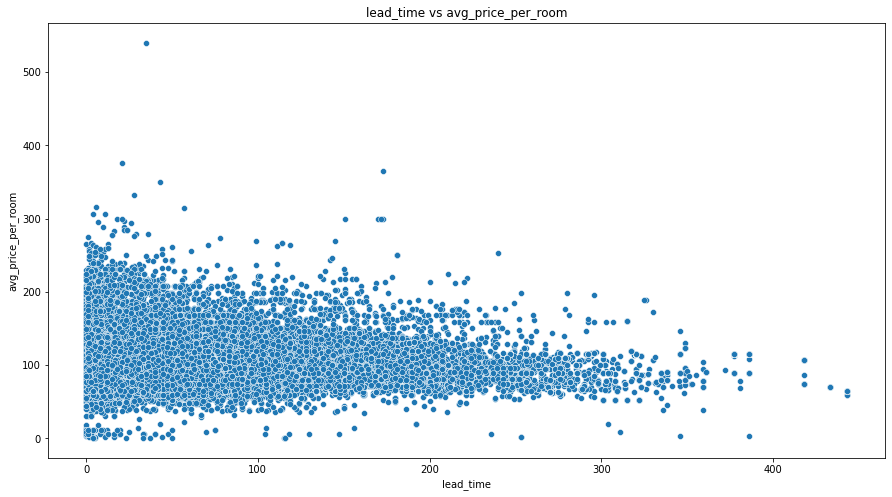

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room')
plt.title('lead_time vs avg_price_per_room')
plt.show()

Observation:

* There is no change in price vis a vis the lead time

In [ ]:
# Calculating the lead time median per room type reserved and booking status
df.groupby(['room_type_reserved','booking_status'])['lead_time'].median().sort_values(ascending=False).reset_index()

,room_type_reserved,booking_status,lead_time
0,Room_Type 2,1,178.5
1,Room_Type 3,1,148.0
2,Room_Type 1,1,146.0
3,Room_Type 5,1,116.5
4,Room_Type 4,1,80.0
5,Room_Type 6,1,70.0
6,Room_Type 2,0,47.5
7,Room_Type 4,0,45.0
8,Room_Type 7,1,43.0
9,Room_Type 1,0,37.0


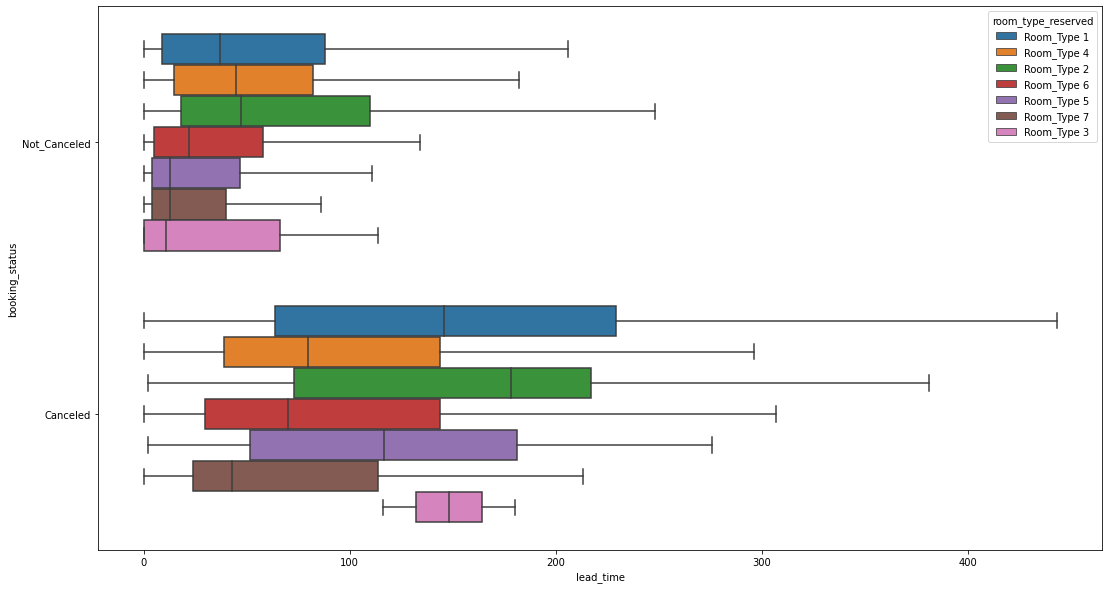

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=data,x='lead_time',y='booking_status',hue='room_type_reserved',showfliers=False)
plt.show()

Observation:

* Bookings are canceled when lead time is high

In [ ]:
# Lead time median for bookings that were not cancelled per type of room
df_not_canceled_booking.groupby(['room_type_reserved'])['lead_time'].median()

room_type_reserved
Room_Type 1    37.0
Room_Type 2    47.5
Room_Type 3    11.0
Room_Type 4    45.0
Room_Type 5    13.0
Room_Type 6    22.0
Room_Type 7    13.0
Name: lead_time, dtype: float64

Observation:

* On average room type 3 has lesser lead time , followed by room type 5 and 7

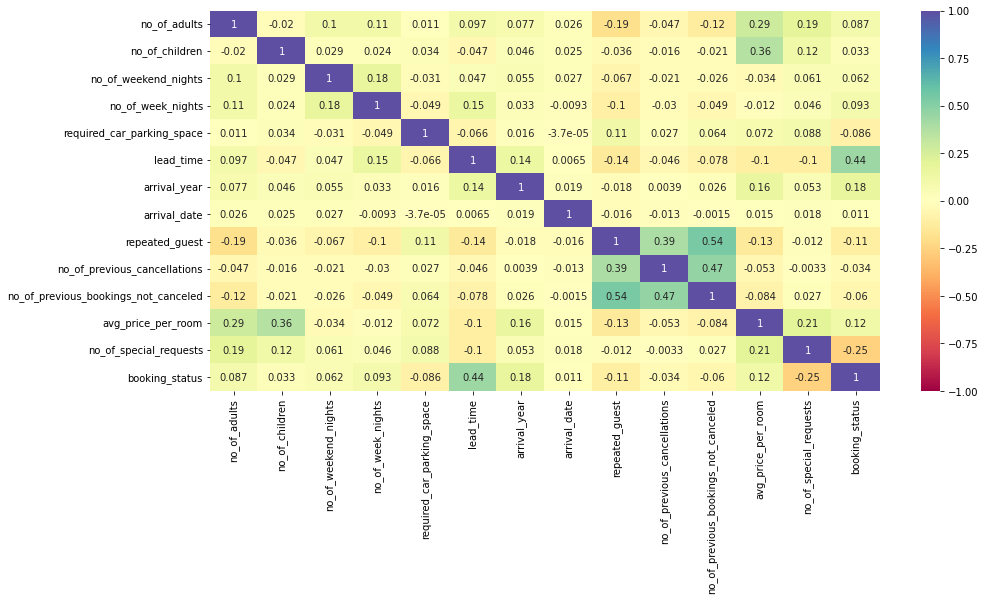

In [ ]:
# Heatmap to check the correlation between numerical data
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observation:

* There are no significant correlation between variables.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

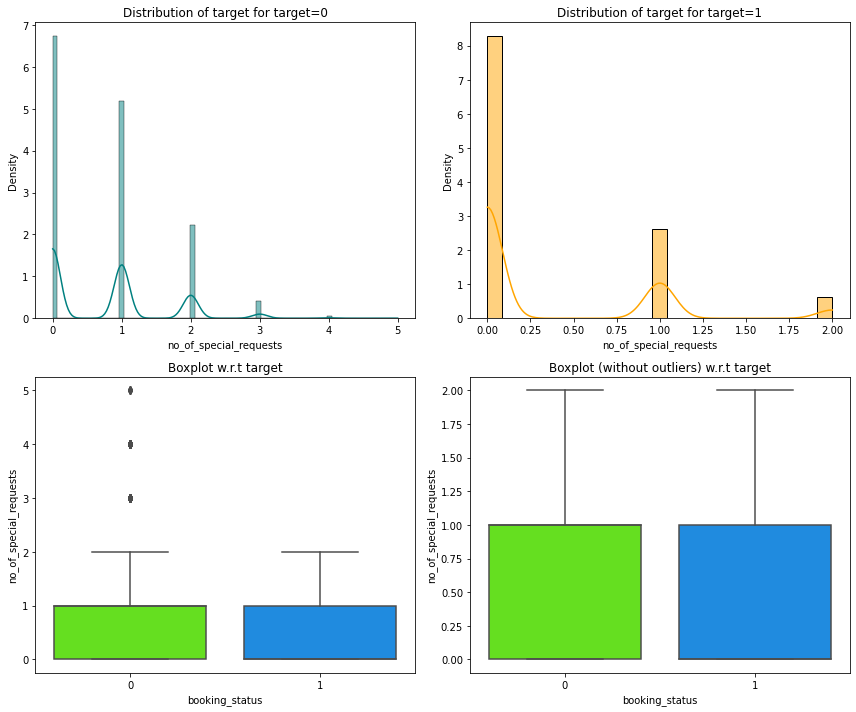

In [ ]:
distribution_plot_wrt_target(df, "no_of_special_requests", "booking_status")

Observation:

* The number of special reqests do not affect the booking status

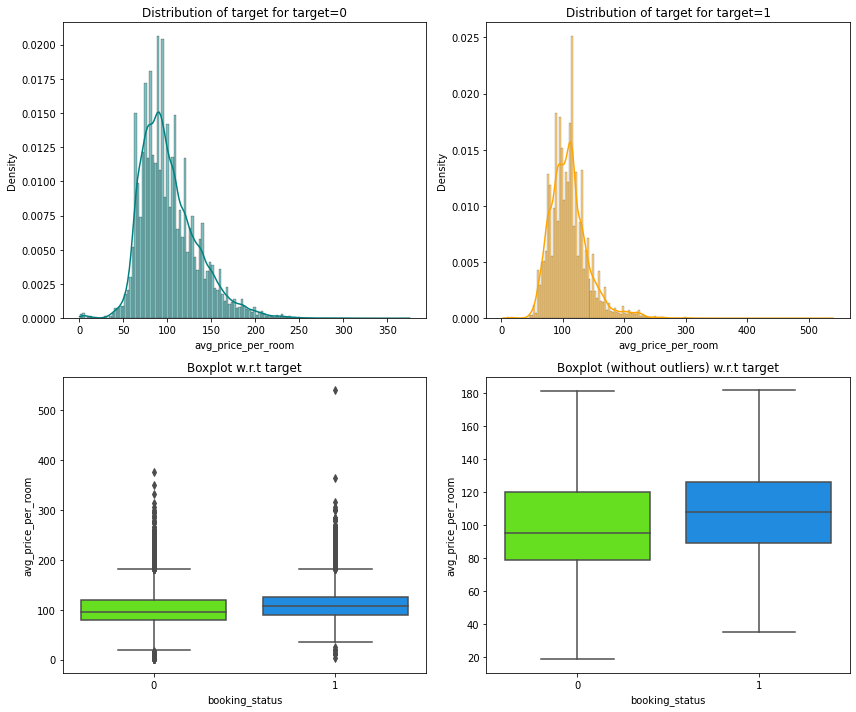

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

Observation:

* It can be observed tha the median average price per room of canceled booking is greater than the median average price per room of not canceled booking
* This indicates that as the price increases, the propability of canceling the booking increases too

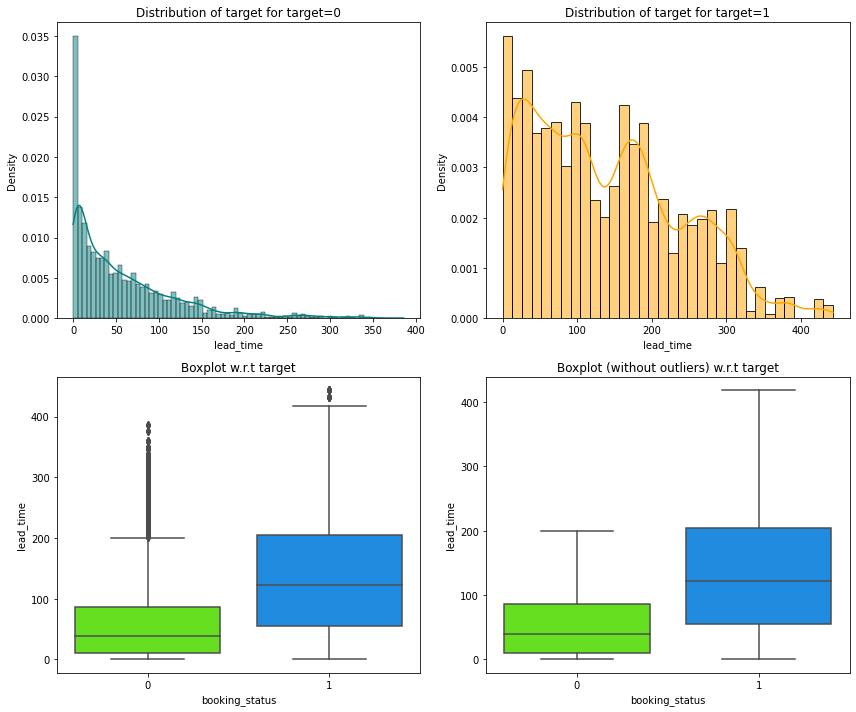

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

Observation:

* It can be observed that the median lead time of canceled booking is greater than the median lead time of not canceled booking
* This indicates that as the lead time increases, the chance of canceling the booking increases too
* There are outliers in both classes

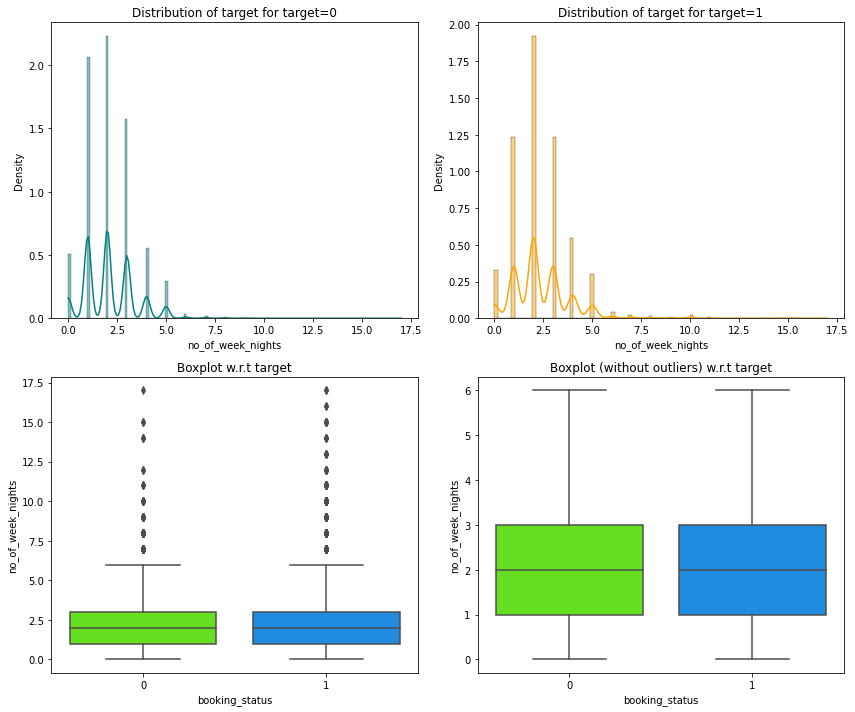

In [ ]:
distribution_plot_wrt_target(df, "no_of_week_nights", "booking_status")

Observation:

* Number of week nights do not affect the status of booking 
* There are outliers in both classes

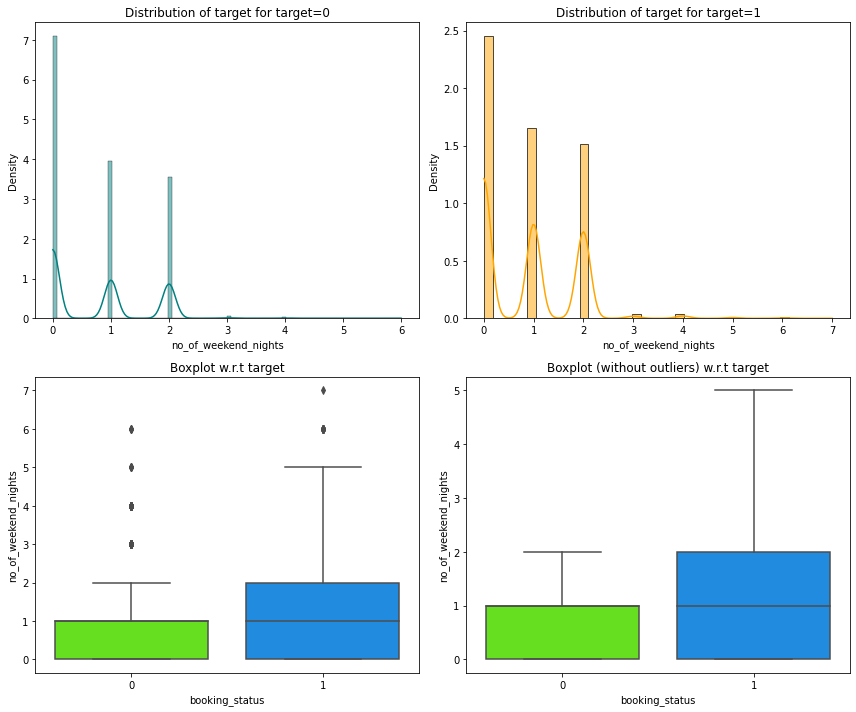

In [ ]:
distribution_plot_wrt_target(df, "no_of_weekend_nights", "booking_status")

Observation:

* Number of weekend nights do not affect the status of booking 
* There are outliers in both classes

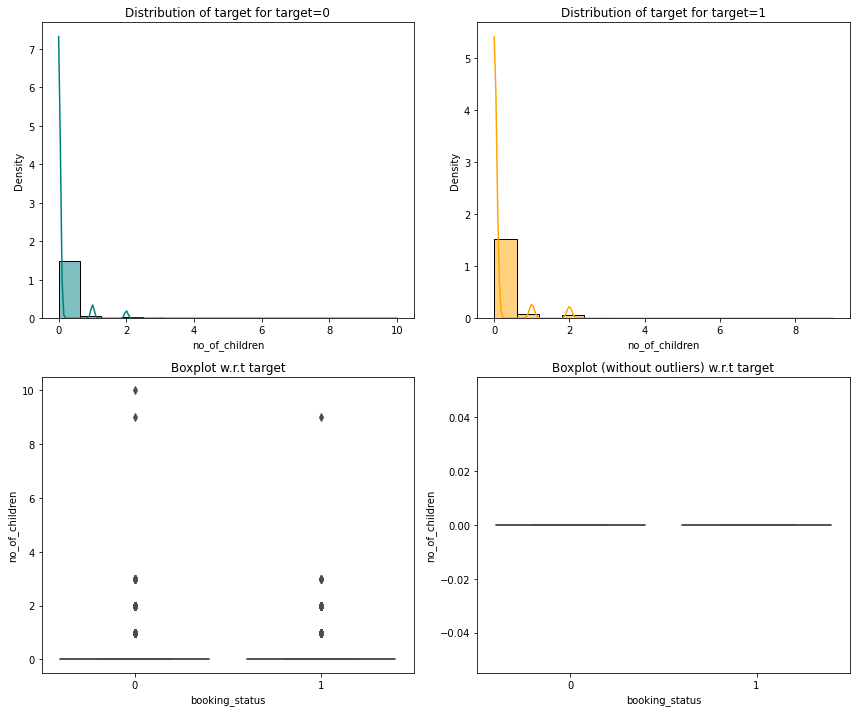

In [ ]:
distribution_plot_wrt_target(df, "no_of_children", "booking_status")

Observation:

* Number of children does not affect the status of booking 
* There are outliers in both classes

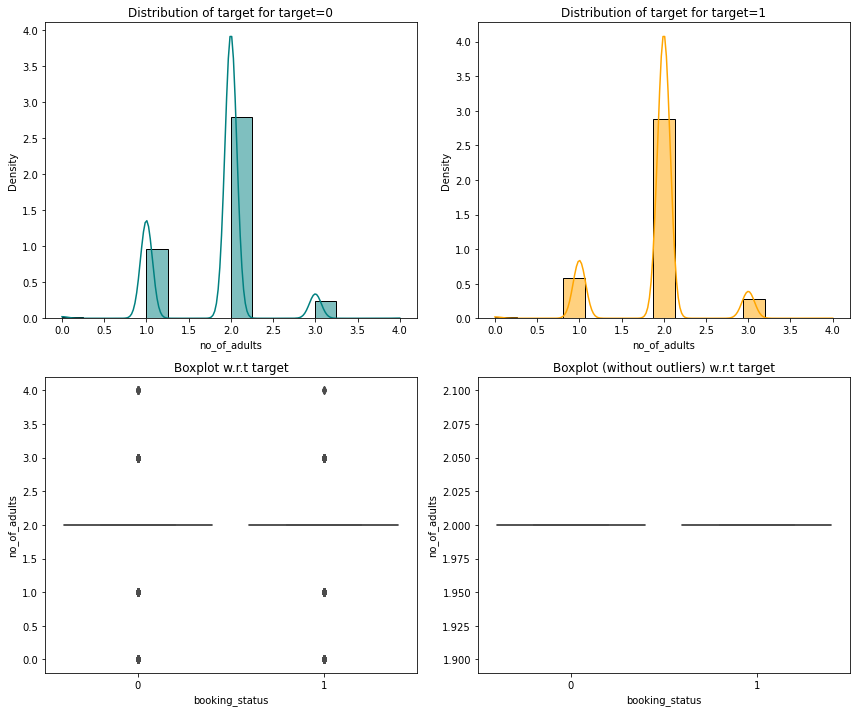

In [ ]:
distribution_plot_wrt_target(df, "no_of_adults", "booking_status")

Observation:

* Number of adults do not affect the status of booking 
* There are outliers in both classes

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


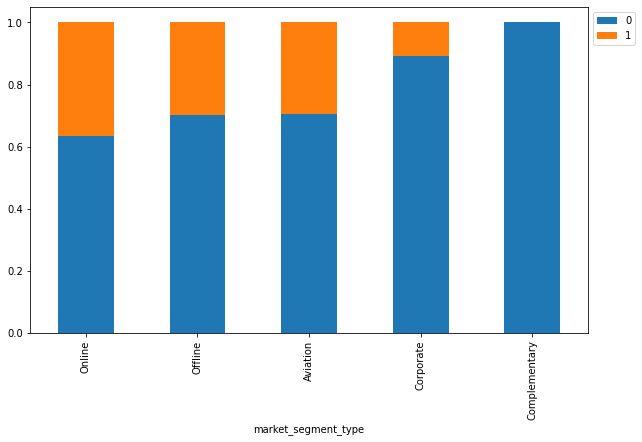

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

Observation:

* It can be observed that customers that come from Online market segment are more likely to cancel the booking compared to customers that come from other market segment
* There is not cancelation from customers that come from complementary market segment

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


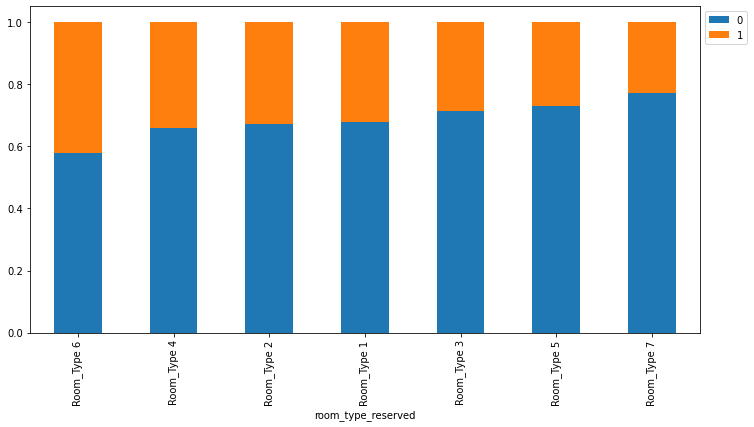

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")

Observation:

* It can be observed that customers that booked Room type 6 are more likely to cancel the booking compared to customers that booked other rooms

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


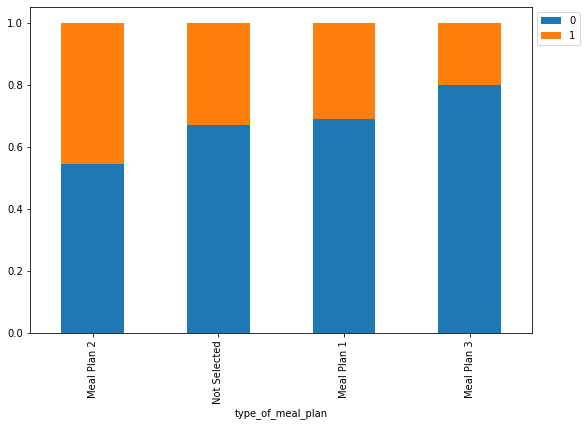

In [ ]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

Observation:

* It can be observed that customers that chose Meal plan 2 are more likely to cancel the booking compared to customers that chose other meal plan

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### **Missing value treatment**

In [ ]:
df1=df.copy()

In [ ]:
# selecting the attributes where missing value is greater than 0
pd.DataFrame({'Count':df1.isnull().sum()[df1.isnull().sum()>0],'Percentage':(df1.isnull().sum()[df1.isnull().sum()>0]/df1.shape[0])*100})

,Count,Percentage
avg_price_per_room,545,1.502412


In [ ]:
 # imputing missing values
 df1['avg_price_per_room']=df1['avg_price_per_room'].fillna(
     df1.groupby(['room_type_reserved','market_segment_type'])['avg_price_per_room'].transform('median')
)

In [ ]:
df1.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                      16
no_of_special_requests                   0
booking_status                           0
dtype: int64

In [ ]:
 # imputing missing values
 df1['avg_price_per_room']=df1['avg_price_per_room'].fillna(
    df1.groupby(['room_type_reserved'])['avg_price_per_room'].transform('median')
)

In [ ]:
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### **Outlier detection and treatment**

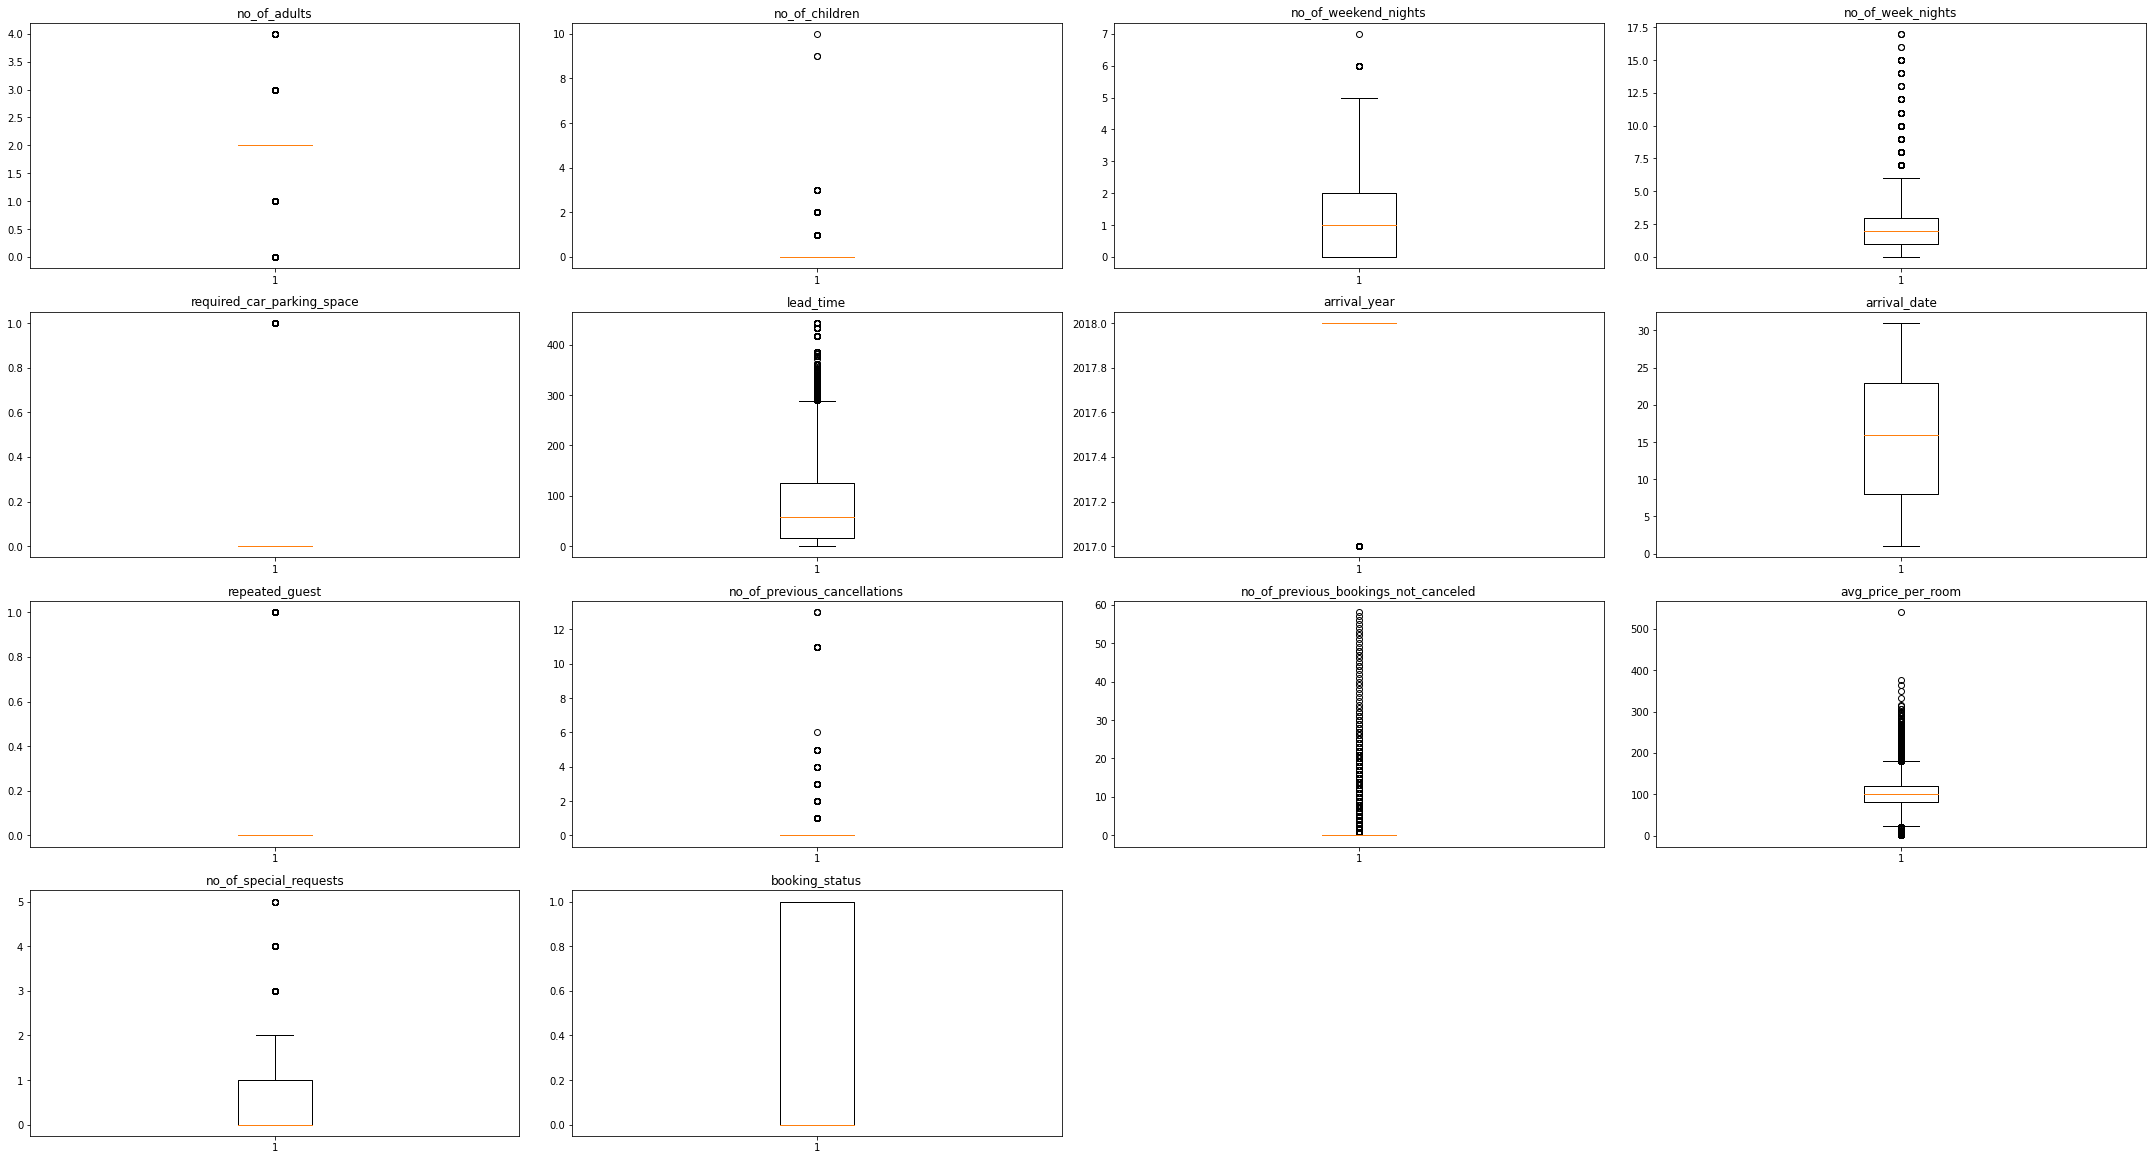

In [ ]:
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

* We will not be treating the outliers since they are genuine values.

## EDA

- It is a good idea to explore the data once again after manipulating it.

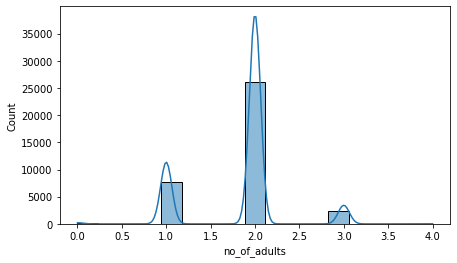

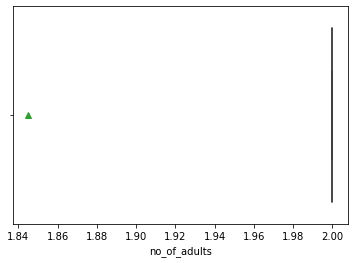

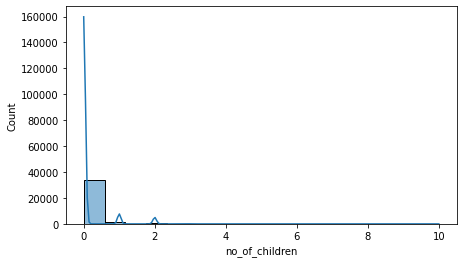

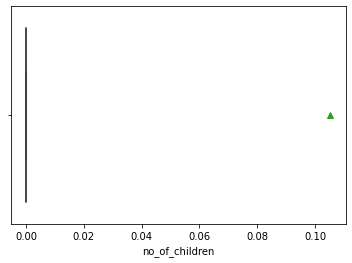

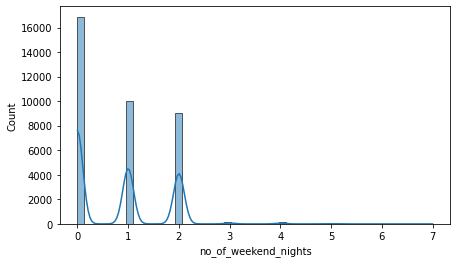

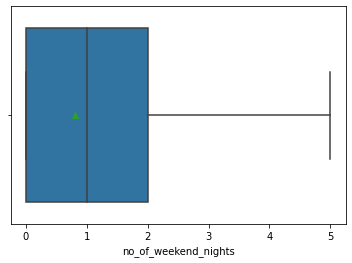

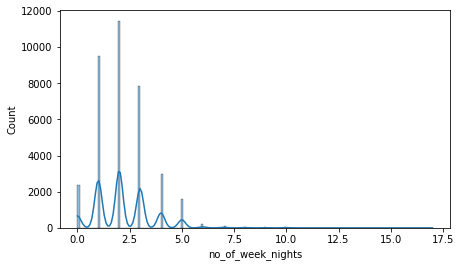

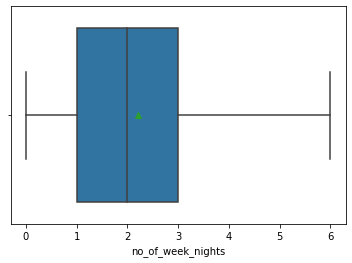

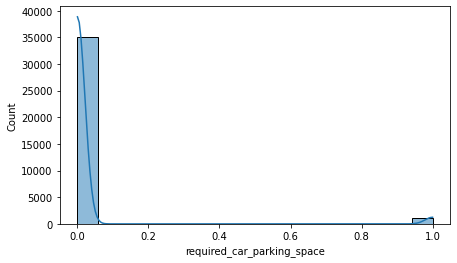

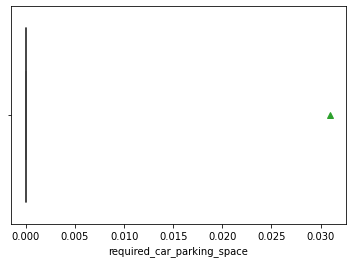

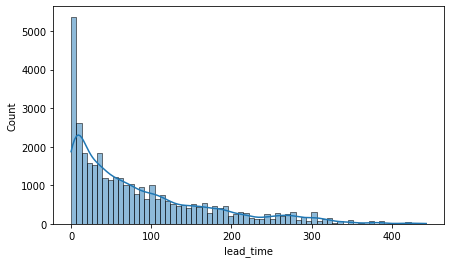

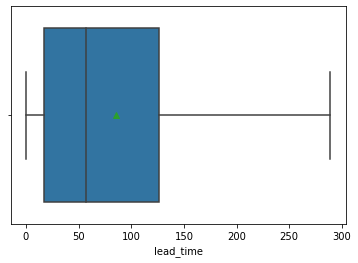

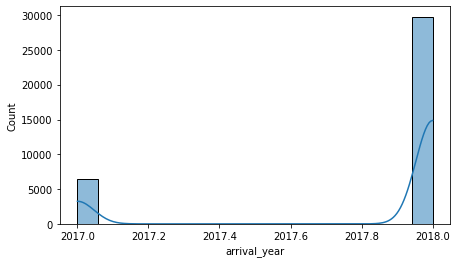

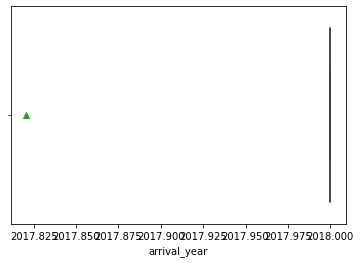

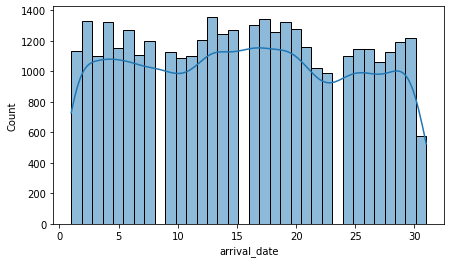

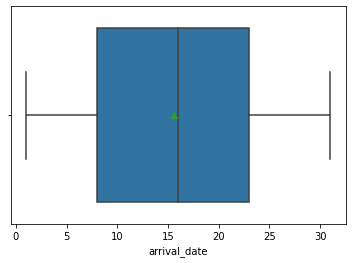

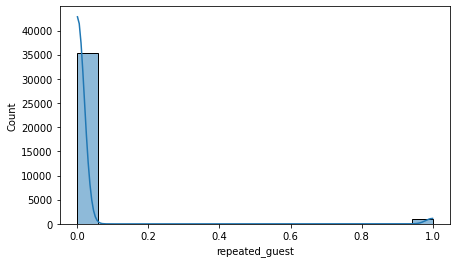

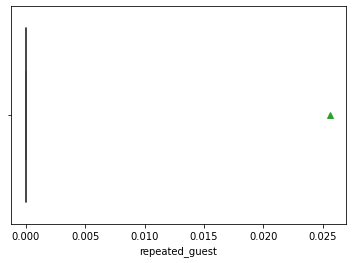

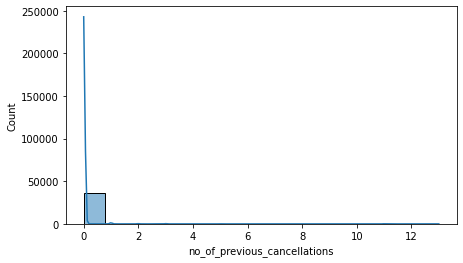

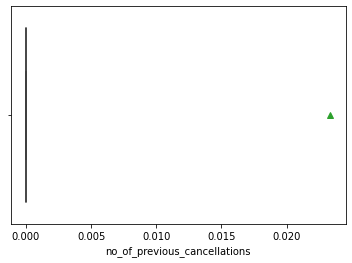

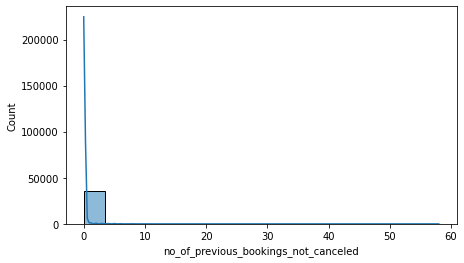

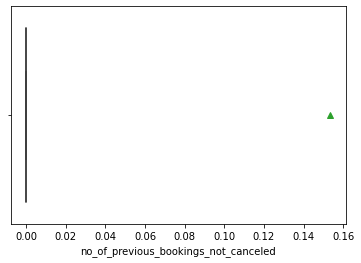

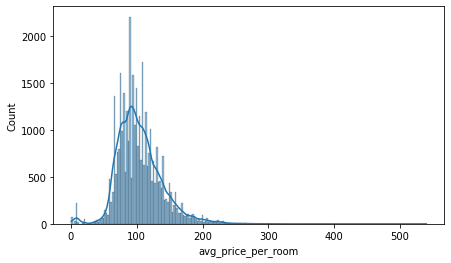

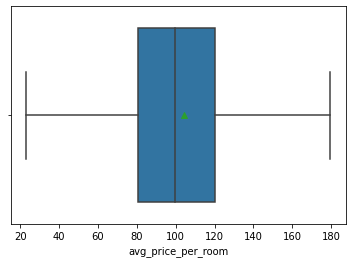

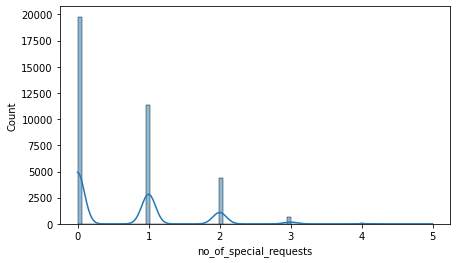

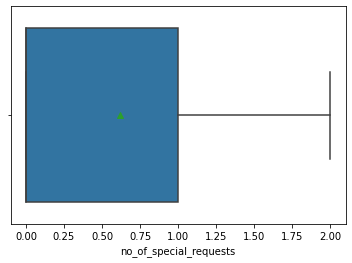

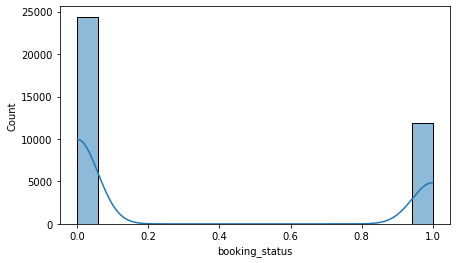

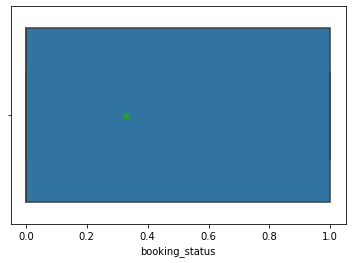

In [ ]:

for i in numerical_col:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df1, x=i,kde=True)
    plt.show()
    sns.boxplot(data=df1,x=i,showmeans=True,showfliers=False)
    plt.show()

Observation:

* It can be observed that the distributions of columns we treated the missing values did not significantly change which is a good sign.

In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


Observation:

* We have treated all missing values including those having values "0"

In [ ]:
# Checking the data type of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  object  
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  object  
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  category
 11  ar

In [ ]:
# Converting arrival month to float
df1['arrival_month']=df1['arrival_month'].astype(float)

### **Preparing data for modeling**

In [ ]:
# Dropping "Booking_ID" column as it does not help in the model
df1.drop(['Booking_ID'],axis=1,inplace=True)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

## Building a Logistic Regression model

In [ ]:
# splitting the data into the dependent and independent variables
X=df1.drop(['booking_status'],axis=1)
y=df1['booking_status']



# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float)).fit(disp=False)
                                                 # setting disp=False will remove the information on number of iterations

print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.3298
Time:                        20:22:48   Log-Likelihood:                -10764.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -953.3306    121.163     -7.868      0.000   -1190.805    -715.856
no_of_adults                             0.0545      

## Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting a guest will cancel the booking but in reality he/she will not- **False positive**

2. Predicting a guest will not cancel the booking but in reality he/she will- **False Negative**

**What is important**:

* Both the cases are important as:

1. If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

2. If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equit

* Hotel will want higher `F1 Score`, higher the F1  score higher minimizes False Negatives and False Positives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

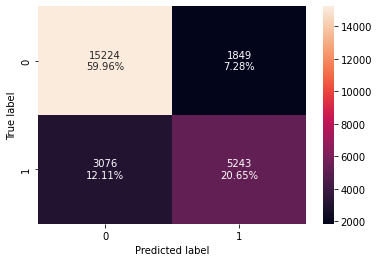

In [ ]:
confusion_matrix_statsmodels(logit, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(logit, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806041,0.630244,0.739284,0.680423


**Observations**

* F1 of the model is 0.680423 and we will try to maximize it further

* The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(X_train)    

,feature,VIF
0,const,3.952398e+07
1,no_of_adults,1.338818e+00
2,no_of_children,1.999916e+00
3,no_of_weekend_nights,1.070606e+00
4,no_of_week_nights,1.096996e+00
5,required_car_parking_space,1.034625e+00
6,lead_time,1.408354e+00
7,arrival_year,1.430697e+00
8,arrival_month,1.282854e+00
9,arrival_date,1.007671e+00


Observation:

* There is no multicollinearity in our variables

### Removing high p-value variables

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online']


In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1).fit(disp=False)
                                                 # setting disp=False will remove the information on number of iterations

print(logit1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.3286
Time:                        20:26:11   Log-Likelihood:                -10782.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -956.7071    120.764     -7.922      0.000   -1193.401    -720.013
no_of_weekend_nights               0.1542      0.020      7.804      0.

In [ ]:
# converting coefficients to odds
odds = np.exp(logit1.params)

# finding the percentage change
perc_change_odds = (np.exp(logit1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
Odds,0.0,1.166772,1.040980,0.203382,1.015886,1.603851,0.953822,0.046186,1.333979,1.018533,0.228035,1.175847,1.227840,0.688237,0.785230,0.505137,0.503647,0.284339,0.392807,2.259459
Change_odd%,-100.0,16.677190,4.097971,-79.661841,1.588612,60.385062,-4.617831,-95.381437,33.397860,1.853252,-77.196484,17.584745,22.783986,-31.176327,-21.477031,-49.486295,-49.635301,-71.566074,-60.719332,125.945949


**Coefficient interpretations**

* **required_car_parking_space**: Holding all other features constant a unit change in required_car_parking_space will increase the odds of a guest canceling the booking by ~1.10 times or a ~10.33% increase in odds.

* **lead_time**: Holding all other features constant a unit change in lead_time will increase the odds of a guest canceling the booking by ~1.01 times or a   ~1.58% increase in odds.

* **avg_price_per_room**: Holding all other features constant a unit change in average price per room will increase the odds of a guest canceling the booking by ~1.01 times or a ~1.85% increase in odds.

* **market_segment_type_Online**: Holding all other features constant a if market segment type is online, it will increase the odds of a guest canceling the booking by ~2.25 times or a ~125.94% increase in odds.

* **no_of_weekend_nights**: Holding all other features constant a unit change in the no_of_weekend_nights will increase the odds of a guest canceling the booking by ~1.16 times or a ~16.67% increase in odds.

* **no_of_week_nights**: Holding all other features constant a unit change in the no_of_week_nights will increase the odds of a guest canceling the booking by ~1.04 times or a ~4.09% increase in odds.

* **arrival_year**: Holding all other features constant a unit change in the arrival_year will increase the odds of a guest canceling the booking by ~160 times or a ~60.38% increase in odds.

### Checking performance of the new model

**Training set performance**

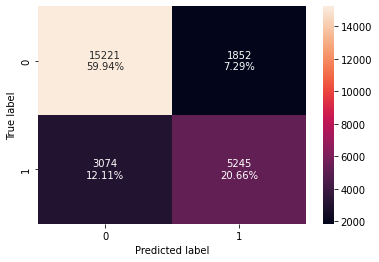

In [ ]:
confusion_matrix_statsmodels(logit1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    logit1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806002,0.630484,0.739045,0.680462


Observation:

 * No significant change in the model performance.

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test1 = X_test[list(X_train1.columns)]

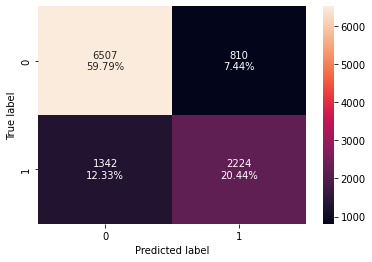

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(logit1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    logit1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80226,0.623668,0.733026,0.673939


Observation:

* As the train and test performances are comparable, the model is not overfitting
* Let us try to improve the performance of the model

## Model Performance Improvement

* Let's see if the Recall can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Then ,we wil check which threshold will give us the best Recall

### ROC Curve and ROC-AUC

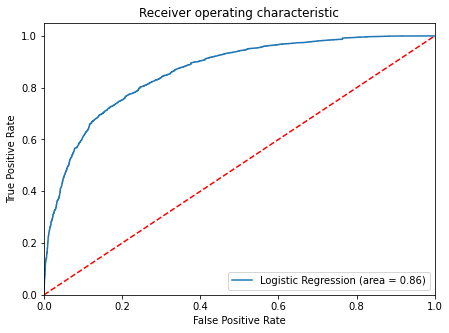

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, logit1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, logit1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observation:

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, logit1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32779247763175184


**Checking model performance on training set**

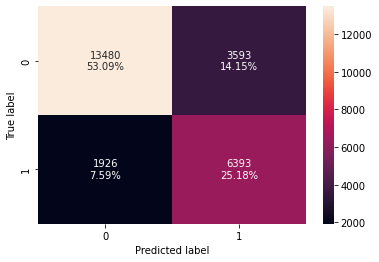

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(logit1, X_train1, y_train,threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.782648,0.768482,0.640196,0.698498


Observation:

*  F1 and recall of model has increased but Precision and Accuracy have decreased
* The model is still giving a good performance.

**Checking model performance on test set**

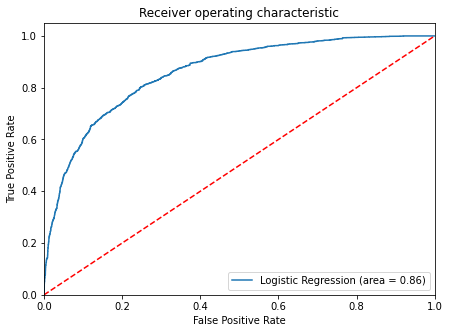

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, logit1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, logit1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

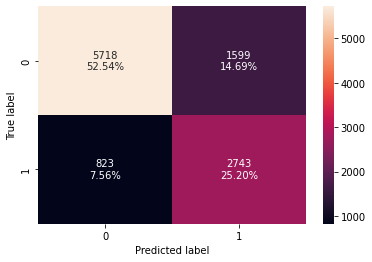

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(logit1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model

log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.777451,0.769209,0.631737,0.693728


Observation:

* The model is performaing well on test data

### Precision-Recall Curve

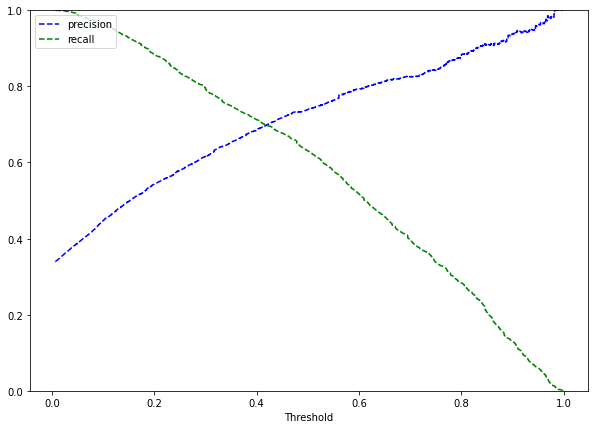

In [ ]:
y_scores = logit1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Observation:

*  At the threshold of 0.4, we get balanced recall and precision.


In [ ]:
# setting the threshold
optimal_threshold_curve = 0.4

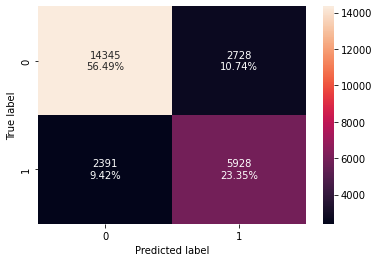

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(logit1, X_train1, y_train,threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    logit1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.798401,0.712586,0.684843,0.698439


* Model is performing well on training set.
* There is an improvement in the model performance compare to the default threshold(0.50).

**Checking model performance on test set**

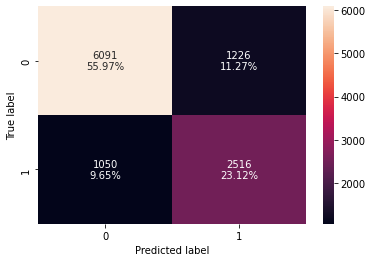

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(logit1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    logit1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("testing performance:")
log_reg_model_test_perf_threshold_curve

testing performance:


,Accuracy,Recall,Precision,F1
0,0.790866,0.705552,0.672368,0.68856


Observation:

* The model is performaing well on test data

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.4 Threshold
Accuracy,0.806002,0.782648,0.798401
Recall,0.630484,0.768482,0.712586
Precision,0.739045,0.640196,0.684843
F1,0.680462,0.698498,0.698439


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.4 Threshold
Accuracy,0.802260,0.777451,0.790866
Recall,0.623668,0.769209,0.705552
Precision,0.733026,0.631737,0.672368
F1,0.673939,0.693728,0.688560


## Building a Decision Tree model

In [ ]:

df_dt=df1.copy()


X_dt=df_dt.drop(['booking_status'],axis=1)
y_dt=df_dt['booking_status']



# creating dummy variables
X_dt = pd.get_dummies(X_dt, drop_first=True)


# splitting in training and test set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1,stratify=y)

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train_dt, y_train_dt
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994368,0.985695,0.997082,0.991356


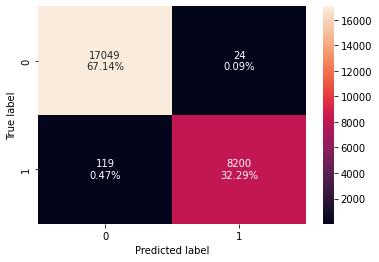

In [ ]:
confusion_matrix_sklearn(dTree, X_train_dt, y_train_dt)

### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test_dt, y_test_dt
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.867408,0.801458,0.795436,0.798436


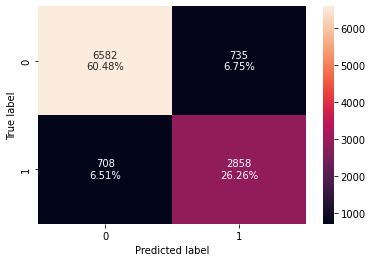

In [ ]:
confusion_matrix_sklearn(dTree, X_test_dt, y_test_dt)

Observation:

* The model is overfitting 

### Visualizing the Decision Tree

In [ ]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


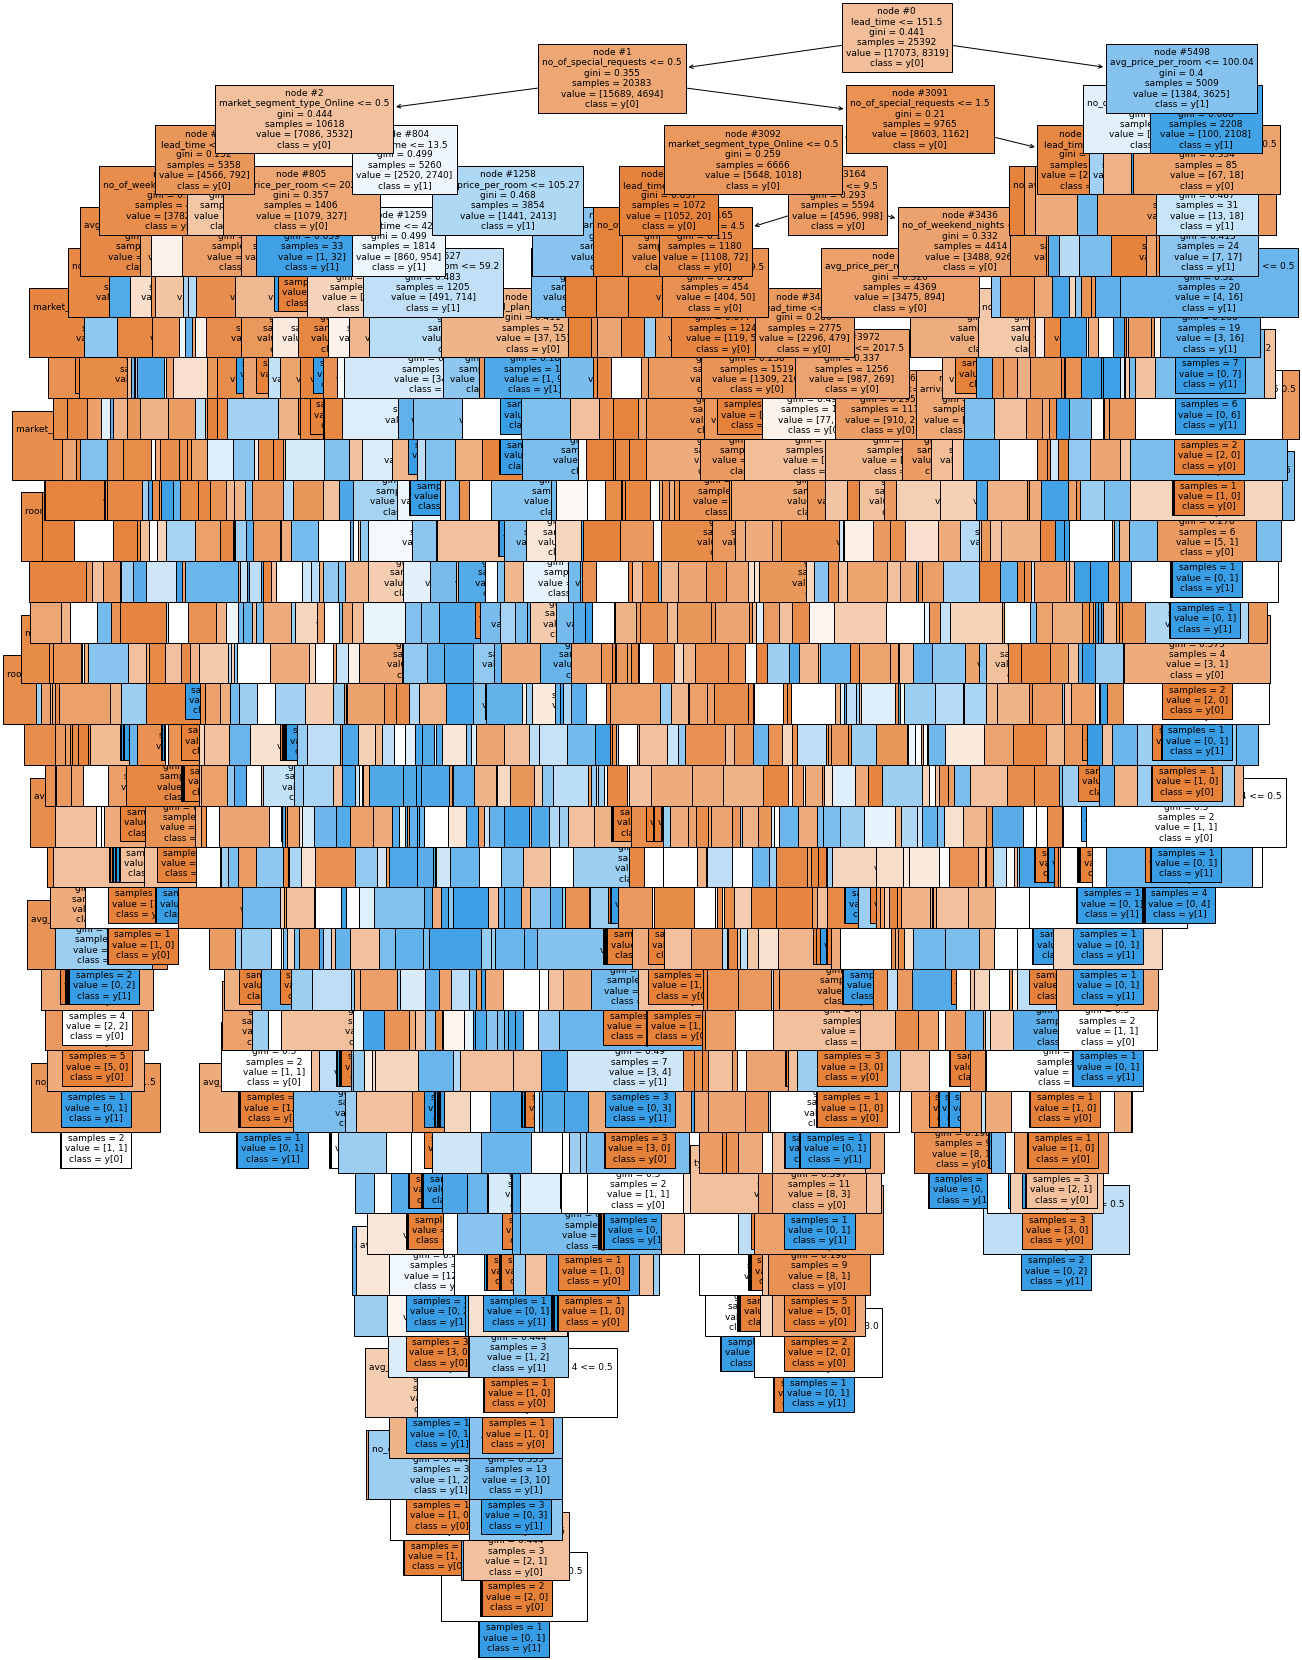

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [70.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [150.00, 0.00] class: 0
|   |   |   |   |   |   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350164
avg_price_per_room                    0.165557
arrival_date                          0.084296
market_segment_type_Online            0.081671
no_of_special_requests                0.071316
arrival_month                         0.069016
no_of_week_nights                     0.044912
no_of_adults                          0.035855
no_of_weekend_nights                  0.035832
arrival_year                          0.014916
room_type_reserved_Room_Type 4        0.008077
market_segment_type_Offline           0.007687
type_of_meal_plan_Not Selected        0.007090
required_car_parking_space            0.006719
type_of_meal_plan_Meal Plan 2         0.005193
no_of_children                        0.004954
market_segment_type_Corporate         0.002194
room_type_reserved_Room_Type 2        0.001791
room_type_reserved_Room_Type 5        0.001208
repeated_guest                        0.000818
room_type_res

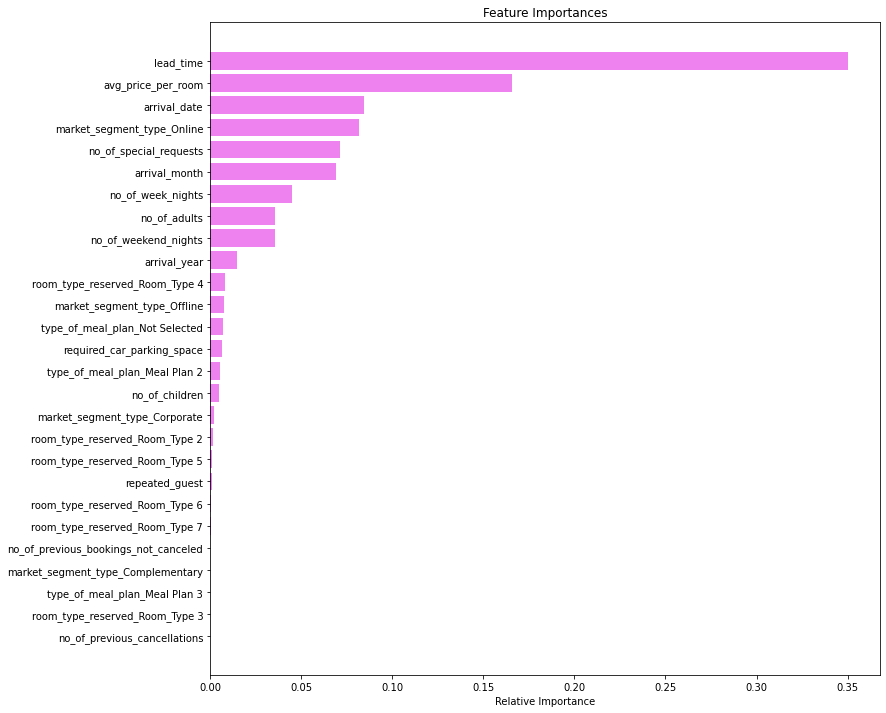

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:

* Lead time, average price per room, market segment type and arrival date are the top 4 important features.

## Do we need to prune the tree?

Yes, we need to prune as the model is overfitting

### Decision Tree (Pre-pruning)

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_depth_train = model_performance_classification_sklearn(
    dTree1, X_train_dt, y_train_dt
)
decision_tree_tune_depth_train

,Accuracy,Recall,Precision,F1
0,0.785562,0.734944,0.653624,0.691903


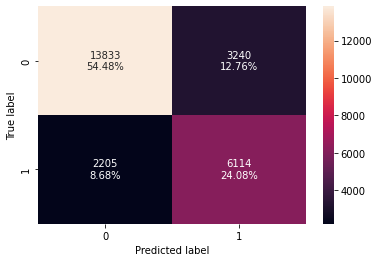

In [ ]:
confusion_matrix_sklearn(dTree1, X_train_dt, y_train_dt)

### Checking model performance on test set

In [ ]:
decision_tree_tune_depth_test = model_performance_classification_sklearn(
    dTree1, X_test_dt, y_test_dt
)

decision_tree_tune_depth_test

,Accuracy,Recall,Precision,F1
0,0.788661,0.73051,0.660497,0.693742


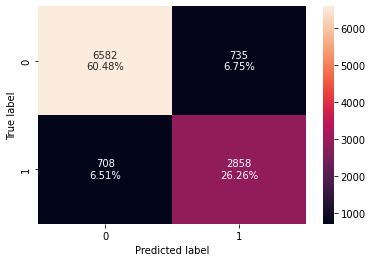

In [ ]:
confusion_matrix_sklearn(dTree, X_test_dt, y_test_dt)

Observation:

* The model is no longer overfitting
* F1 and accuracy are better on test data

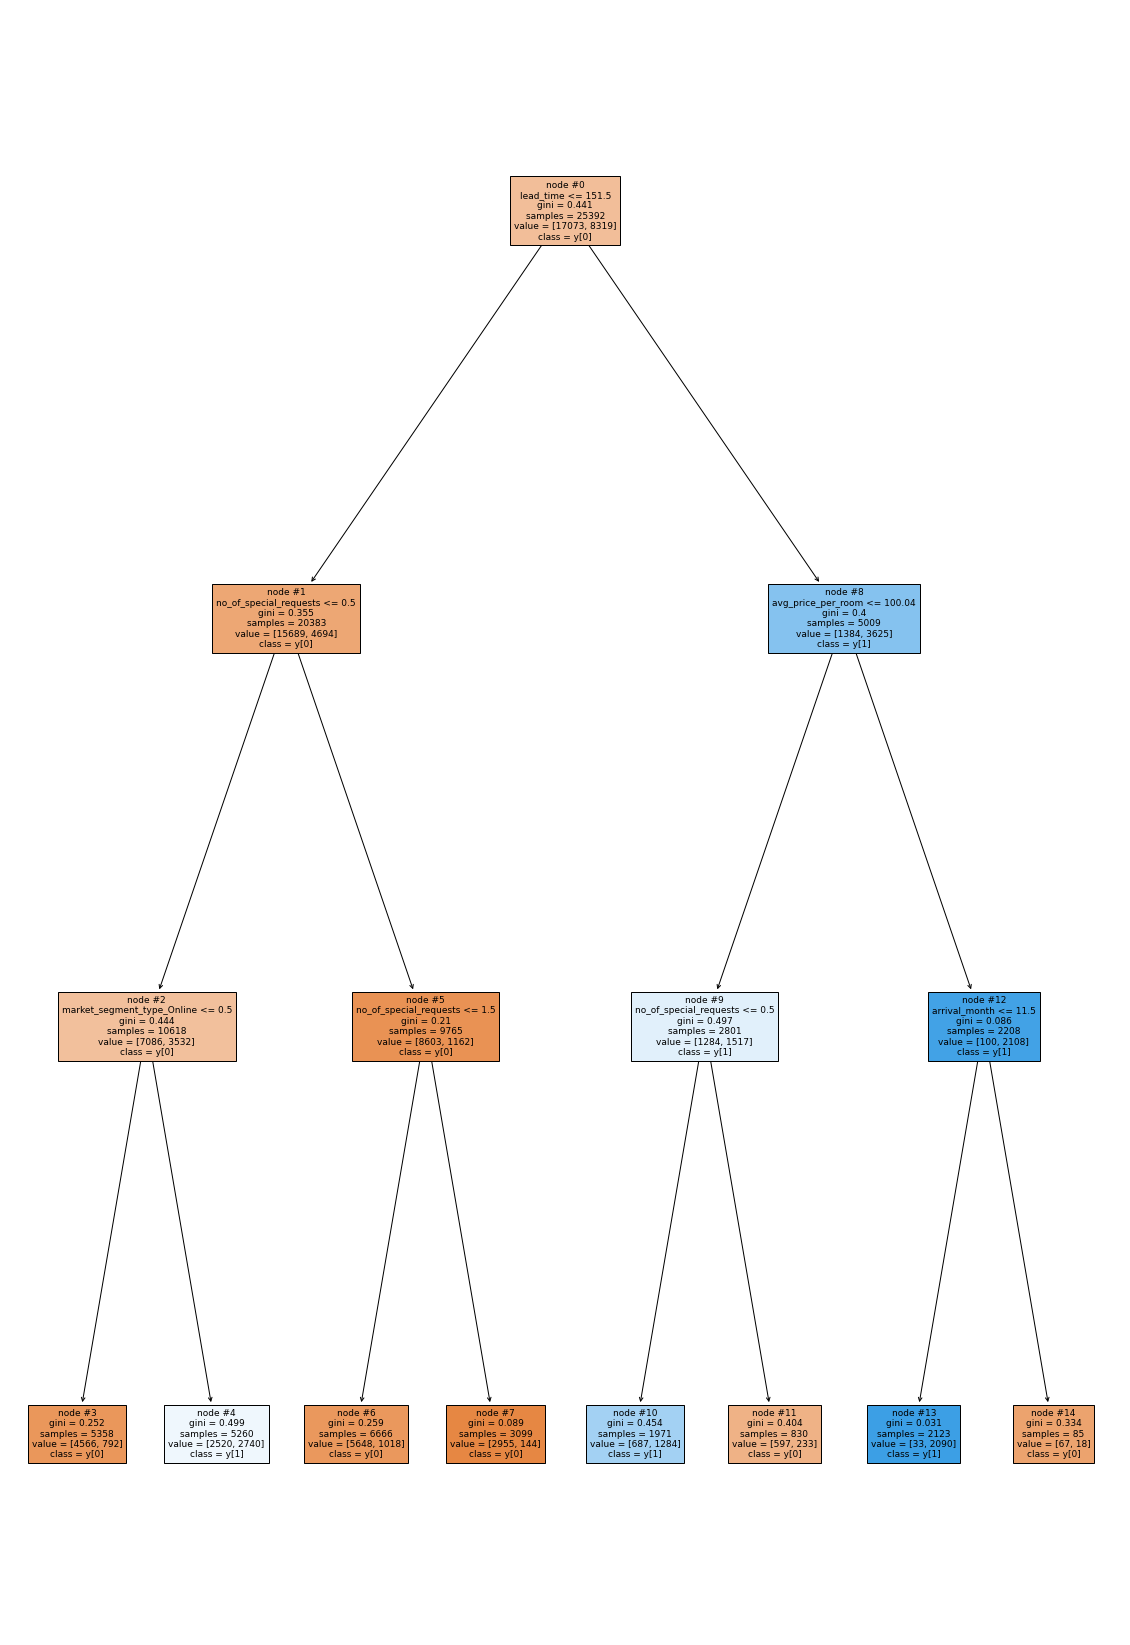

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4566.00, 792.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2520.00, 2740.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5648.00, 1018.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2955.00, 144.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [687.00, 1284.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [597.00, 233.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [33.00, 2090.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [67.00, 18.00] class: 0



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.503486
market_segment_type_Online            0.190039
no_of_special_requests                0.172994
avg_price_per_room                    0.108384
arrival_month                         0.025098
no_of_week_nights                     0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
required_car_parking_space            0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previou

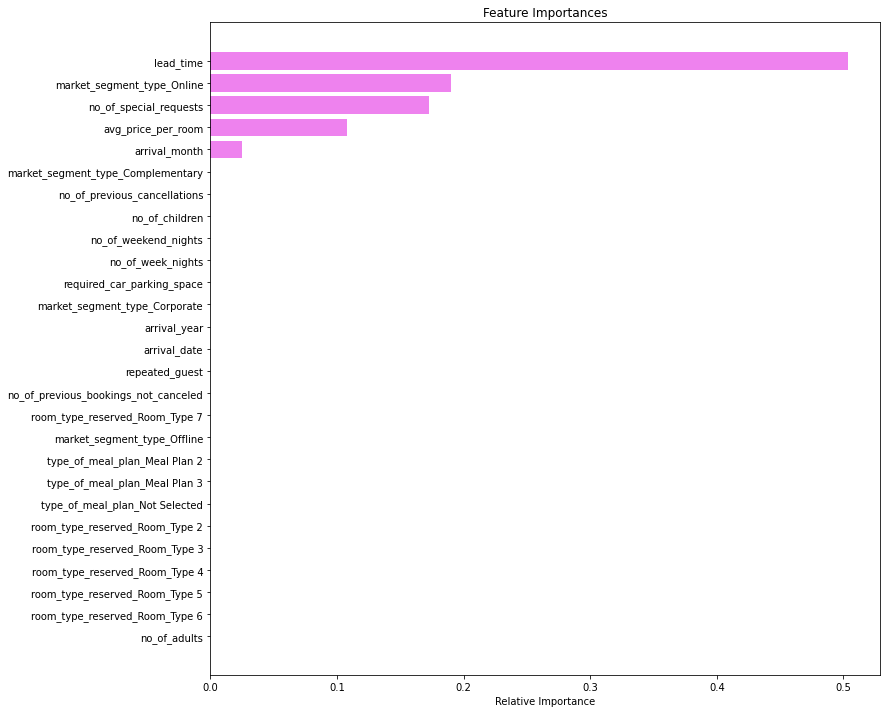

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's try to improve our improve our model performance.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              #'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1],
              #'criterion': ['entropy', 'gini'],
              #'splitter': ['best', 'random'],
              'class_weight': [None, 'balanced'],
              'min_samples_split': [10, 30, 50, 70]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_impurity_decrease=0.001, min_samples_split=10,
                       random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train_dt, y_train_dt
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.842273,0.780382,0.748789,0.764259


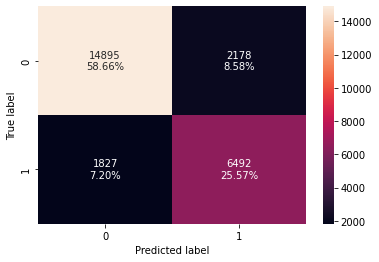

In [ ]:
confusion_matrix_sklearn(estimator, X_train_dt, y_train_dt)

Observation:

* The F1 has improved on the training set as compared to the previous models.

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test_dt, y_test_dt
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84021,0.76977,0.749386,0.759441


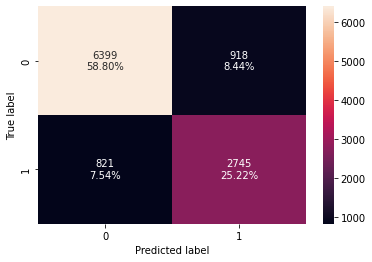

In [ ]:
confusion_matrix_sklearn(estimator, X_test_dt, y_test_dt)

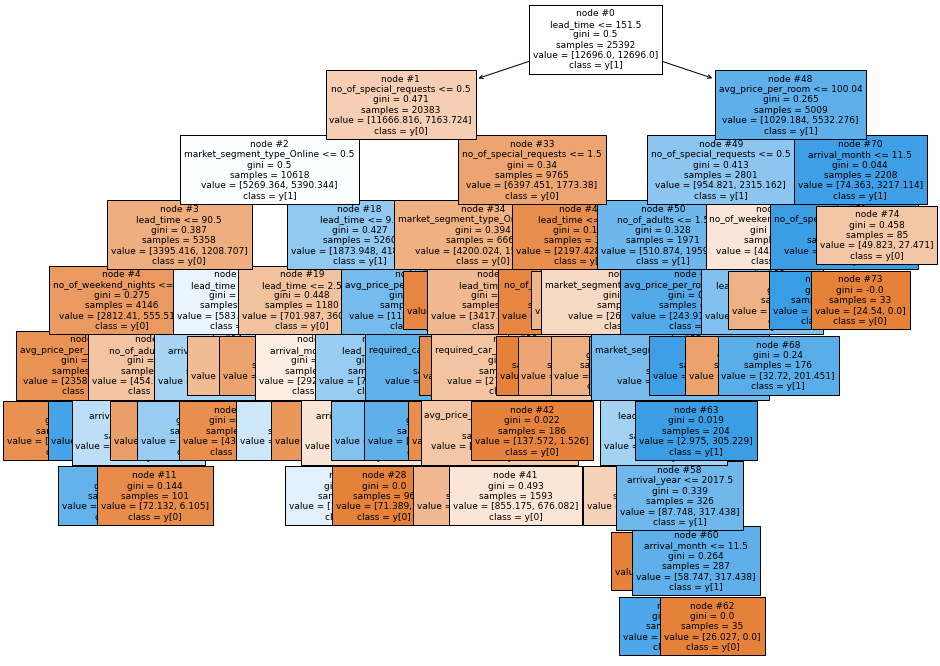

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- weights: [2356.56, 291.49] class: 0
|   |   |   |   |   |--- avg_price_per_room >  202.00
|   |   |   |   |   |   |--- weights: [1.49, 22.89] class: 1
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |   |   |--- weights: [31.98, 151.09] class: 1
|   |   |   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |   |   |--- weights: [72.13, 6.10] class: 0
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [350.25, 83.94] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train_dt.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.468211
market_segment_type_Online            0.182962
no_of_special_requests                0.167517
avg_price_per_room                    0.064367
arrival_month                         0.041191
no_of_adults                          0.033905
no_of_weekend_nights                  0.020756
required_car_parking_space            0.011063
arrival_year                          0.005974
no_of_week_nights                     0.004053
no_of_previous_cancellations          0.000000
room_type_reserved_Room_Type 4        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 3        0.000000
no_of_previous_bookings_not_canceled  0.000000
room_type_res

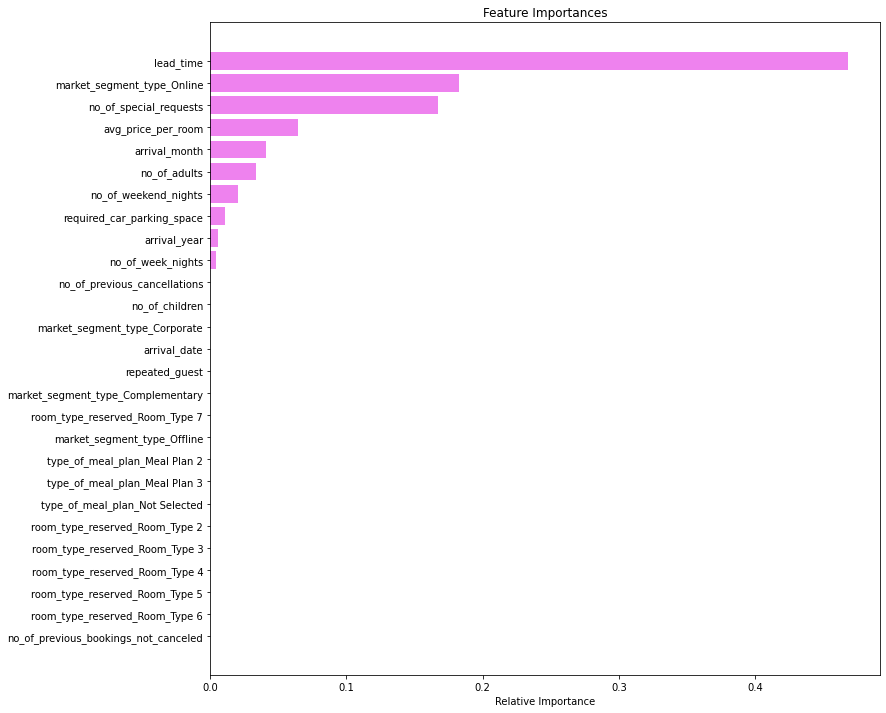

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007421
1,0.000000e+00,0.007421
2,2.206302e-07,0.007422
3,4.327745e-07,0.007422
4,7.032586e-07,0.007423
...,...,...
1340,7.146763e-03,0.286917
1341,1.256596e-02,0.299483
1342,1.659748e-02,0.316080
1343,2.369501e-02,0.363470


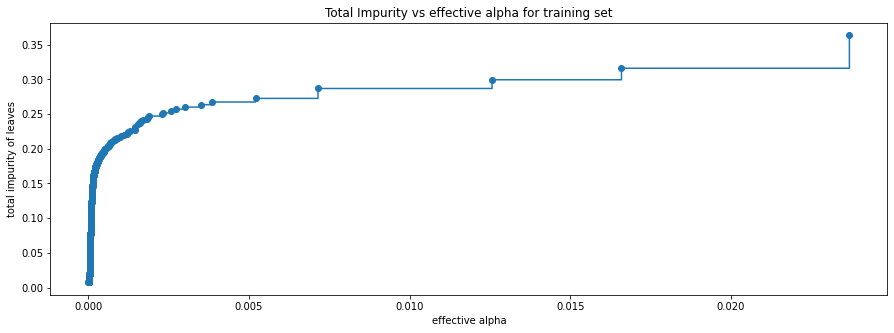

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train_dt, y_train_dt)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07710217431082489


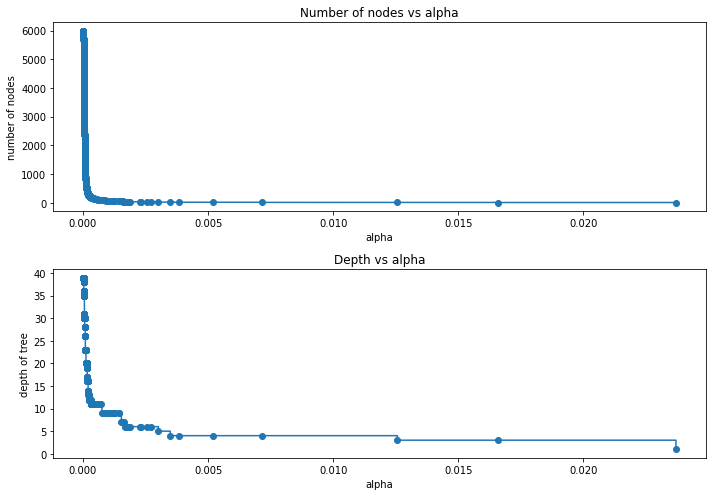

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 vs alpha for training and testing sets

In [ ]:
F1_train_dt = []
for clf in clfs:
    pred_train_dt = clf.predict(X_train_dt)
    values_train_dt = f1_score(y_train_dt, pred_train_dt)
    F1_train_dt.append(values_train_dt)

In [ ]:
F1_test_dt = []
for clf in clfs:
    pred_test_dt = clf.predict(X_test_dt)
    values_test_dt = f1_score(y_test_dt, pred_test_dt)
    F1_test_dt.append(values_test_dt)

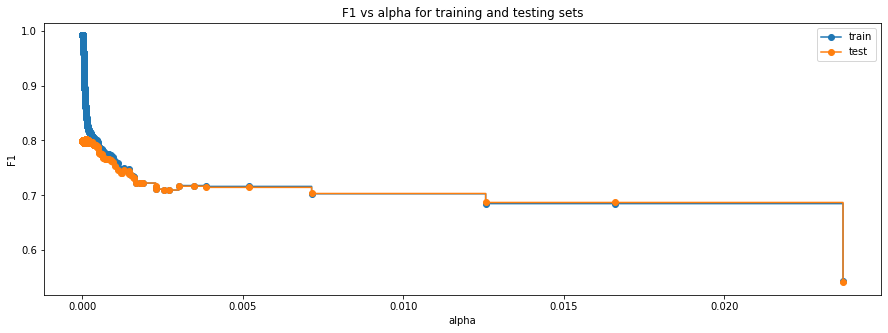

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, F1_train_dt, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, F1_test_dt, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(F1_test_dt)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010658460874261779, random_state=1)


### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train_dt, y_train_dt
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.911389,0.824017,0.897134,0.859023


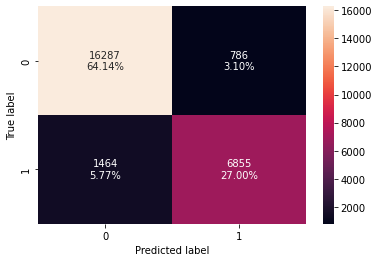

In [ ]:
confusion_matrix_sklearn(best_model, X_train_dt, y_train_dt)

### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test_dt, y_test_dt
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.877424,0.762479,0.848097,0.803012


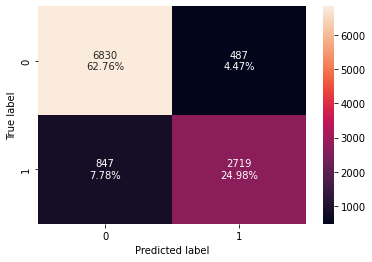

In [ ]:
confusion_matrix_sklearn(best_model, X_test_dt, y_test_dt)


### Visualizing the Decision Tree

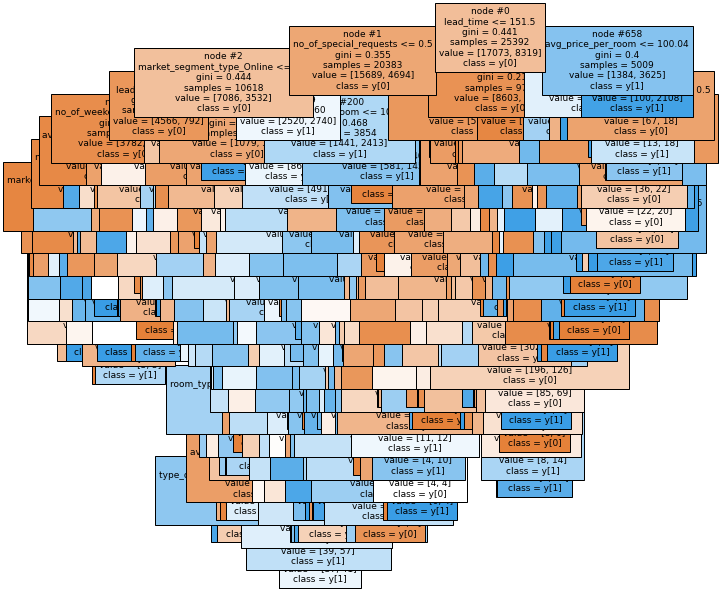

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |   |--- weights: [503.00, 38.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  88.60
|   |   |   |   |   |   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [134.00, 14.00] class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  9.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train_dt.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.402716
avg_price_per_room                    0.145942
market_segment_type_Online            0.116403
no_of_special_requests                0.100735
arrival_month                         0.061673
no_of_adults                          0.036881
arrival_date                          0.034888
no_of_weekend_nights                  0.027080
arrival_year                          0.019301
no_of_week_nights                     0.019120
market_segment_type_Offline           0.010452
required_car_parking_space            0.008940
type_of_meal_plan_Meal Plan 2         0.004550
type_of_meal_plan_Not Selected        0.003856
room_type_reserved_Room_Type 4        0.002057
market_segment_type_Corporate         0.002056
no_of_children                        0.001269
room_type_reserved_Room_Type 2        0.001044
room_type_reserved_Room_Type 5        0.001036
no_of_previous_bookings_not_canceled  0.000000
no_of_previou

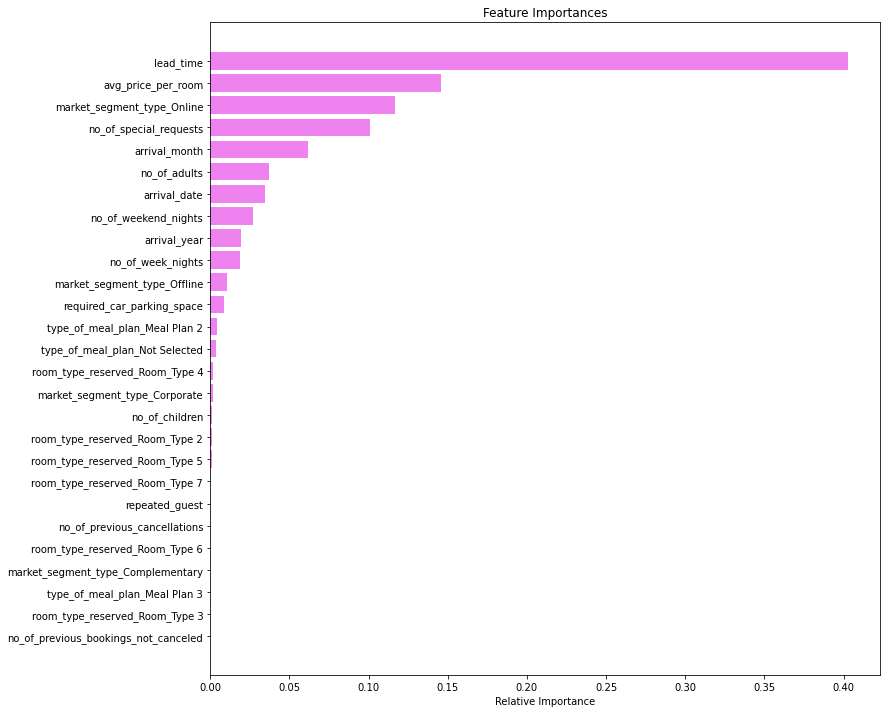

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_depth_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree (Max_Depth)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree (Max_Depth),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994368,0.785562,0.842273,0.911389
Recall,0.985695,0.734944,0.780382,0.824017
Precision,0.997082,0.653624,0.748789,0.897134
F1,0.991356,0.691903,0.764259,0.859023


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_depth_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree (Max_Depth)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree,Decision Tree (Max_Depth),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.867408,0.788661,0.840210,0.877424
Recall,0.801458,0.730510,0.769770,0.762479
Precision,0.795436,0.660497,0.749386,0.848097
F1,0.798436,0.693742,0.759441,0.803012


Observation:

* Decision tree models with pre-pruning(SearchGrid) and post-pruning both are giving high F1 scores on both training and test sets.
* We will choose the post pruned tree as the best model since it is giving a  higher F1 score on the train and test sets than the pre-pruned tree. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- The model can be used to predict if a guest will cancel or not and can correctly identify 80.3% of both cancel and not cancel

- lead_time,avg_price_per_room,market_segment_type_Online and no_of_special_requests are the most important variables in predicting whether a guest will cancel or not

* When the lead time is more 120 days,INN Hotel should be aware that there is a high chance of canceling the booking

* When average price per room is 115 and more , INN Hotel should that there is a high chance of canceling the booking 

* INN Hotel cancellations and refunds policies:
  1. Room type 1: Guests should cancel the booking 37 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  2. Room type 2: Guests should cancel the booking 47 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  3. Room type 3: Guests should cancel the booking 11 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  4. Room type 4: Guests should cancel the booking 45 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  5. Room type 5: Guests should cancel the booking 13 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  6. Room type 6: Guests should cancel the booking 22 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised
  7. Room type 7: Guests should cancel the booking 13 days or more prior the arrival date to be entitled to full refund otherwise he will be penalised

* Penalty to be decided by INN Hotel depending on rescources spent in preparation of the room

* INN Hotel can keep increasing the penalty as the lead time decreases

* setting the lead time average of each type of room as cancellation base will give INN Hotel assurance that they can still have time to sell it to other guests.

*  if the lead time is greater than 65.5 and average price per room is greater than 47.1 , then the guest is most likey to cancel

* If average price per room is greater than 116.02,then the guest is most likey to cancel

* If average price per room is greater than 202 and arrival month is October, then the guest is most likey to cancel

* If market segment type is corporate and lead time is greater than 42.5,then the guest is most likey to cancel

* If arrivale date is 29 ,lead time less than or equal to 60.5 and arrival month is March , then the guest is most likey to cancel


* If the lead time is less than or equal to 116.5, number of week nights is less than or equal to 2.5, arrival date is 7 and average price per room is    73.5, then the guest is most likey to cancel

* If arrival date is 27 and number of weekend nights is greater than 15, then the guest is most likey to cancel

* If number of weekend nights is greater than 0.5, arrival date is 29,average price per room is less than or equal to 73.62 and number of adults is less than or equal to 1.5 , then the guest is most likey to cancel

* If average price per room is greater than 93.58, arrival date is 16, arrival month is September and lead time is greater than 112.5, then the guest is most likey to cancel.

* If arrival month is September and average price per room is less than or equal to 108.5, then the guest is most likey to cancel

* If lead time is greater than 116.5, number of week nights is less than or equal to 0.5 and arrival month is July, then the guest is most likey to cancel

* If lead time is greater than 125, arrival date less than or equal to 14.5 and average price pwe room is greater than 115.81, then the guest is most likey to cancel

* If market segment type is online, lead time is less than or equal to 2.5 and average price per room is greater than 115.81, then the guest is most likey to cancel

* If average price per room is greater than 99.17, arrival month is August, lead time is less than or equal to 3.5, number of week nights is greater than  1.5 and room type reserved is room type 4, then the guest is most likey to cancel

* Given room type 1,4,6 are the most popular, INN Hotel should think how to increase the number of those type of rooms

* INN Hotel should increase the price of room in their busiest months, from September to December

* 64% of guests come from online, INN Hotel shoud increase their visibility on different social media.

* We have a high number of guests with children in August and December , INN Hotel can put in place some paying children activities.

* Given a high chance of cancelling a booking when the average price per room is 115 and more, INN Hotel should thing of reducing their price a bite below 115

* INN Hotel shoud find a way of increasing their booking throught other market segment than Online as the chance of cancelling throught these segmets is less